In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use ("dark_background")

In [3]:
dataset = pd.read_excel('Z-Alizadeh sani dataset.xlsx')
dataset

Age  Weight  Length    Sex        BMI  DM  HTN  Current Smoker  \
0     53      90     175   Male  29.387755   0    1               1   
1     67      70     157  Fmale  28.398718   0    1               0   
2     54      54     164   Male  20.077335   0    0               1   
3     66      67     158  Fmale  26.838648   0    1               0   
4     50      87     153  Fmale  37.165193   0    1               0   
..   ...     ...     ...    ...        ...  ..  ...             ...   
298   58      84     168   Male  29.761905   0    0               0   
299   55      64     152  Fmale  27.700831   0    0               0   
300   48      77     160  Fmale  30.078125   0    1               0   
301   57      90     159  Fmale  35.599858   1    0               0   
302   56      85     170  Fmale  29.411765   0    1               1   

     EX-Smoker  FH  ...    K   Na    WBC Lymph Neut  PLT EF-TTE  Region RWMA  \
0            0   0  ...  4.7  141   5700    39   52  261     50            0   
1            0   0  ...  4.7  156   7700    38   55  165     40            4   
2            0   0  ...  4.7  139   7400    38   60  230     40            2   
3            0   0  ...  4.4  142  13000    18   72  742     55            0   
4            0   0  ...  4.0  140   9200    55   39  274     50            0   
..         ...  ..  ...  ...  ...    ...   ...  ...  ...    ...          ...   
298          0   0  ...  4.8  146   8500    34   58  251     45            0   
299          0   0  ...  4.0  139  11400    16   80  377     40            0   
300          0   1  ...  4.0  140   9000    35   55  279     55            0   
301          0   0  ...  3.8  141   3800    48   40  208     55            0   
302          0   0  ...  4.4  147   6000    32   55  302     55            0   

        VHD    Cath  
0         N     Cad  
1         N     Cad  
2      mild     Cad  
3    Severe  Normal  
4    Severe  Normal  
..      ...     ...  
298       N     Cad  
299    mild  Normal  
300       N  Normal  
301       N  Normal  
302       N     Cad  

[303 rows x 56 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [5]:
dataset.isna().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
B

<Axes: >

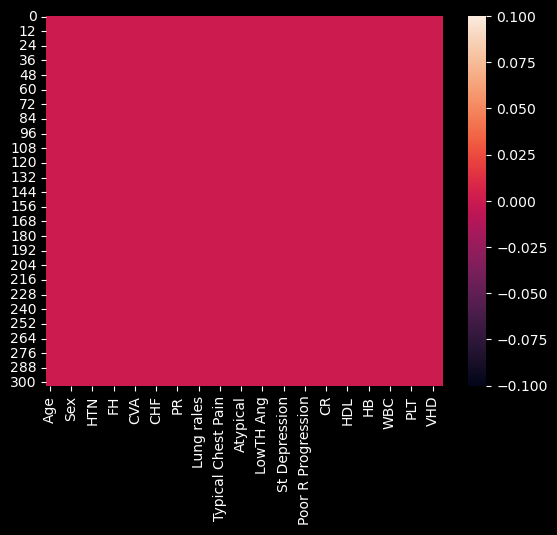

In [6]:
sns.heatmap(dataset.isna())

In [7]:
dataset.describe()

Age      Weight      Length         BMI          DM         HTN  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    58.897690   73.831683  164.716172   27.248339    0.297030    0.590759   
std     10.392278   11.987358    9.327661    4.098865    0.457706    0.492507   
min     30.000000   48.000000  140.000000   18.115413    0.000000    0.000000   
25%     51.000000   65.000000  158.000000   24.514380    0.000000    0.000000   
50%     58.000000   74.000000  165.000000   26.775510    0.000000    1.000000   
75%     66.000000   81.000000  171.000000   29.411765    1.000000    1.000000   
max     86.000000  120.000000  188.000000   40.900658    1.000000    1.000000   

       Current Smoker   EX-Smoker          FH          BP  ...         ESR  \
count      303.000000  303.000000  303.000000  303.000000  ...  303.000000   
mean         0.207921    0.033003    0.158416  129.554455  ...   19.462046   
std          0.406491    0.178941    0.365734   18.938105  ...   15.936475   
min          0.000000    0.000000    0.000000   90.000000  ...    1.000000   
25%          0.000000    0.000000    0.000000  120.000000  ...    9.000000   
50%          0.000000    0.000000    0.000000  130.000000  ...   15.000000   
75%          0.000000    0.000000    0.000000  140.000000  ...   26.000000   
max          1.000000    1.000000    1.000000  190.000000  ...   90.000000   

               HB           K          Na           WBC       Lymph  \
count  303.000000  303.000000  303.000000    303.000000  303.000000   
mean    13.153465    4.230693  140.996700   7562.046205   32.399340   
std      1.610452    0.458202    3.807885   2413.739323    9.972592   
min      8.900000    3.000000  128.000000   3700.000000    7.000000   
25%     12.200000    3.900000  139.000000   5800.000000   26.000000   
50%     13.200000    4.200000  141.000000   7100.000000   32.000000   
75%     14.200000    4.500000  143.000000   8800.000000   39.000000   
max     17.600000    6.600000  156.000000  18000.000000   60.000000   

             Neut         PLT      EF-TTE  Region RWMA  
count  303.000000  303.000000  303.000000   303.000000  
mean    60.148515  221.488449   47.231023     0.620462  
std     10.182493   60.796199    8.927194     1.132531  
min     32.000000   25.000000   15.000000     0.000000  
25%     52.500000  183.500000   45.000000     0.000000  
50%     60.000000  210.000000   50.000000     0.000000  
75%     67.000000  250.000000   55.000000     1.000000  
max     89.000000  742.000000   60.000000     4.000000  

[8 rows x 34 columns]

<Axes: >

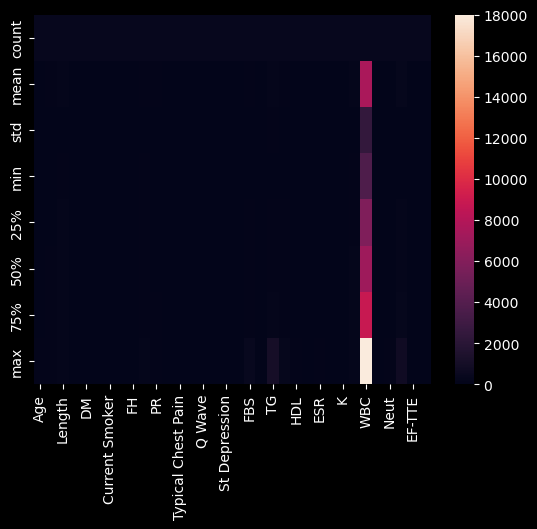

In [8]:
sns.heatmap(dataset.describe())

In [9]:
dataset.corr()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_3220\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


Age    Weight    Length       BMI        DM  \
Age                 1.000000 -0.264585 -0.163753 -0.161414  0.072543   
Weight             -0.264585  1.000000  0.460631  0.725005 -0.003531   
Length             -0.163753  0.460631  1.000000 -0.269356 -0.052318   
BMI                -0.161414  0.725005 -0.269356  1.000000  0.045360   
DM                  0.072543 -0.003531 -0.052318  0.045360  1.000000   
HTN                 0.246690 -0.028532 -0.153668  0.091652  0.217864   
Current Smoker     -0.143879  0.157385  0.335248 -0.089398 -0.208458   
EX-Smoker           0.076608  0.068977  0.079034  0.005016 -0.120087   
FH                 -0.183900  0.021963  0.004488  0.014045 -0.064434   
BP                  0.215527 -0.025930 -0.072511  0.031916  0.128010   
PR                  0.023576 -0.075468 -0.077549 -0.015680  0.025350   
Edema               0.132487 -0.035323 -0.039241 -0.009812  0.016133   
Typical Chest Pain  0.138387 -0.002986  0.023149 -0.012911  0.105623   
Function Class      0.051424  0.040371 -0.012710  0.064736  0.086200   
Q Wave             -0.061677  0.020584  0.045229 -0.015837  0.072583   
St Elevation       -0.056926  0.071406  0.050602  0.029896  0.028955   
St Depression       0.177432 -0.114619 -0.150480 -0.009146  0.015532   
Tinversion          0.041913 -0.021033  0.023690 -0.043311 -0.058998   
FBS                 0.015385  0.012737 -0.094789  0.089380  0.677940   
CR                  0.227097  0.150226  0.162634  0.034338  0.028606   
TG                 -0.110793  0.078469 -0.034389  0.109422  0.108792   
LDL                -0.033576 -0.023233 -0.090970  0.040001 -0.027167   
HDL                -0.035793 -0.059713 -0.050594 -0.024338 -0.043890   
BUN                 0.300663 -0.057670 -0.071229 -0.011139  0.144394   
ESR                 0.183127 -0.139314 -0.222182  0.023259  0.190397   
HB                 -0.161018  0.274218  0.341028  0.031107 -0.156382   
K                   0.154203 -0.018287 -0.086277  0.044587  0.100064   
Na                 -0.071886  0.013916 -0.066590  0.067402 -0.083030   
WBC                 0.020398 -0.020214  0.066658 -0.074928  0.110345   
Lymph              -0.171529  0.020120 -0.156436  0.139583  0.033413   
Neut                0.173030 -0.051093  0.115075 -0.140037 -0.024417   
PLT                -0.049500 -0.094192 -0.133446 -0.003964  0.051054   
EF-TTE             -0.140512  0.026789 -0.093295  0.093903 -0.052507   
Region RWMA         0.108663 -0.007648  0.095715 -0.079739  0.064891   

                         HTN  Current Smoker  EX-Smoker        FH        BP  \
Age                 0.246690       -0.143879   0.076608 -0.183900  0.215527   
Weight             -0.028532        0.157385   0.068977  0.021963 -0.025930   
Length             -0.153668        0.335248   0.079034  0.004488 -0.072511   
BMI                 0.091652       -0.089398   0.005016  0.014045  0.031916   
DM                  0.217864       -0.208458  -0.120087 -0.064434  0.128010   
HTN                 1.000000       -0.169000   0.041045 -0.098467  0.570418   
Current Smoker     -0.169000        1.000000  -0.094652  0.089532 -0.079115   
EX-Smoker           0.041045       -0.094652   1.000000 -0.080152  0.028781   
FH                 -0.098467        0.089532  -0.080152  1.000000 -0.082999   
BP                  0.570418       -0.079115   0.028781 -0.082999  1.000000   
PR                  0.124176        0.002796  -0.065240 -0.057717  0.183231   
Edema               0.134600       -0.062343   0.057211  0.004589  0.085339   
Typical Chest Pain  0.122788        0.079987   0.058855 -0.035920  0.114926   
Function Class      0.092880       -0.037824   0.024499  0.010162  0.017544   
Q Wave             -0.043583       -0.084608   0.121591 -0.062024 -0.033462   
St Elevation       -0.040627        0.042192   0.047341 -0.009379 -0.061334   
St Depression       0.016736        0.023762  -0.014970  0.080075 -0.032295   
Tinversion          0.115040        0.200881   0.082060  0.054250  0.046643   
FBS

C:\Users\mahmo\AppData\Local\Temp\ipykernel_3220\3249925955.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())
C:\Users\mahmo\AppData\Local\Temp\ipykernel_3220\3249925955.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_corr_features = dataset.corr().index


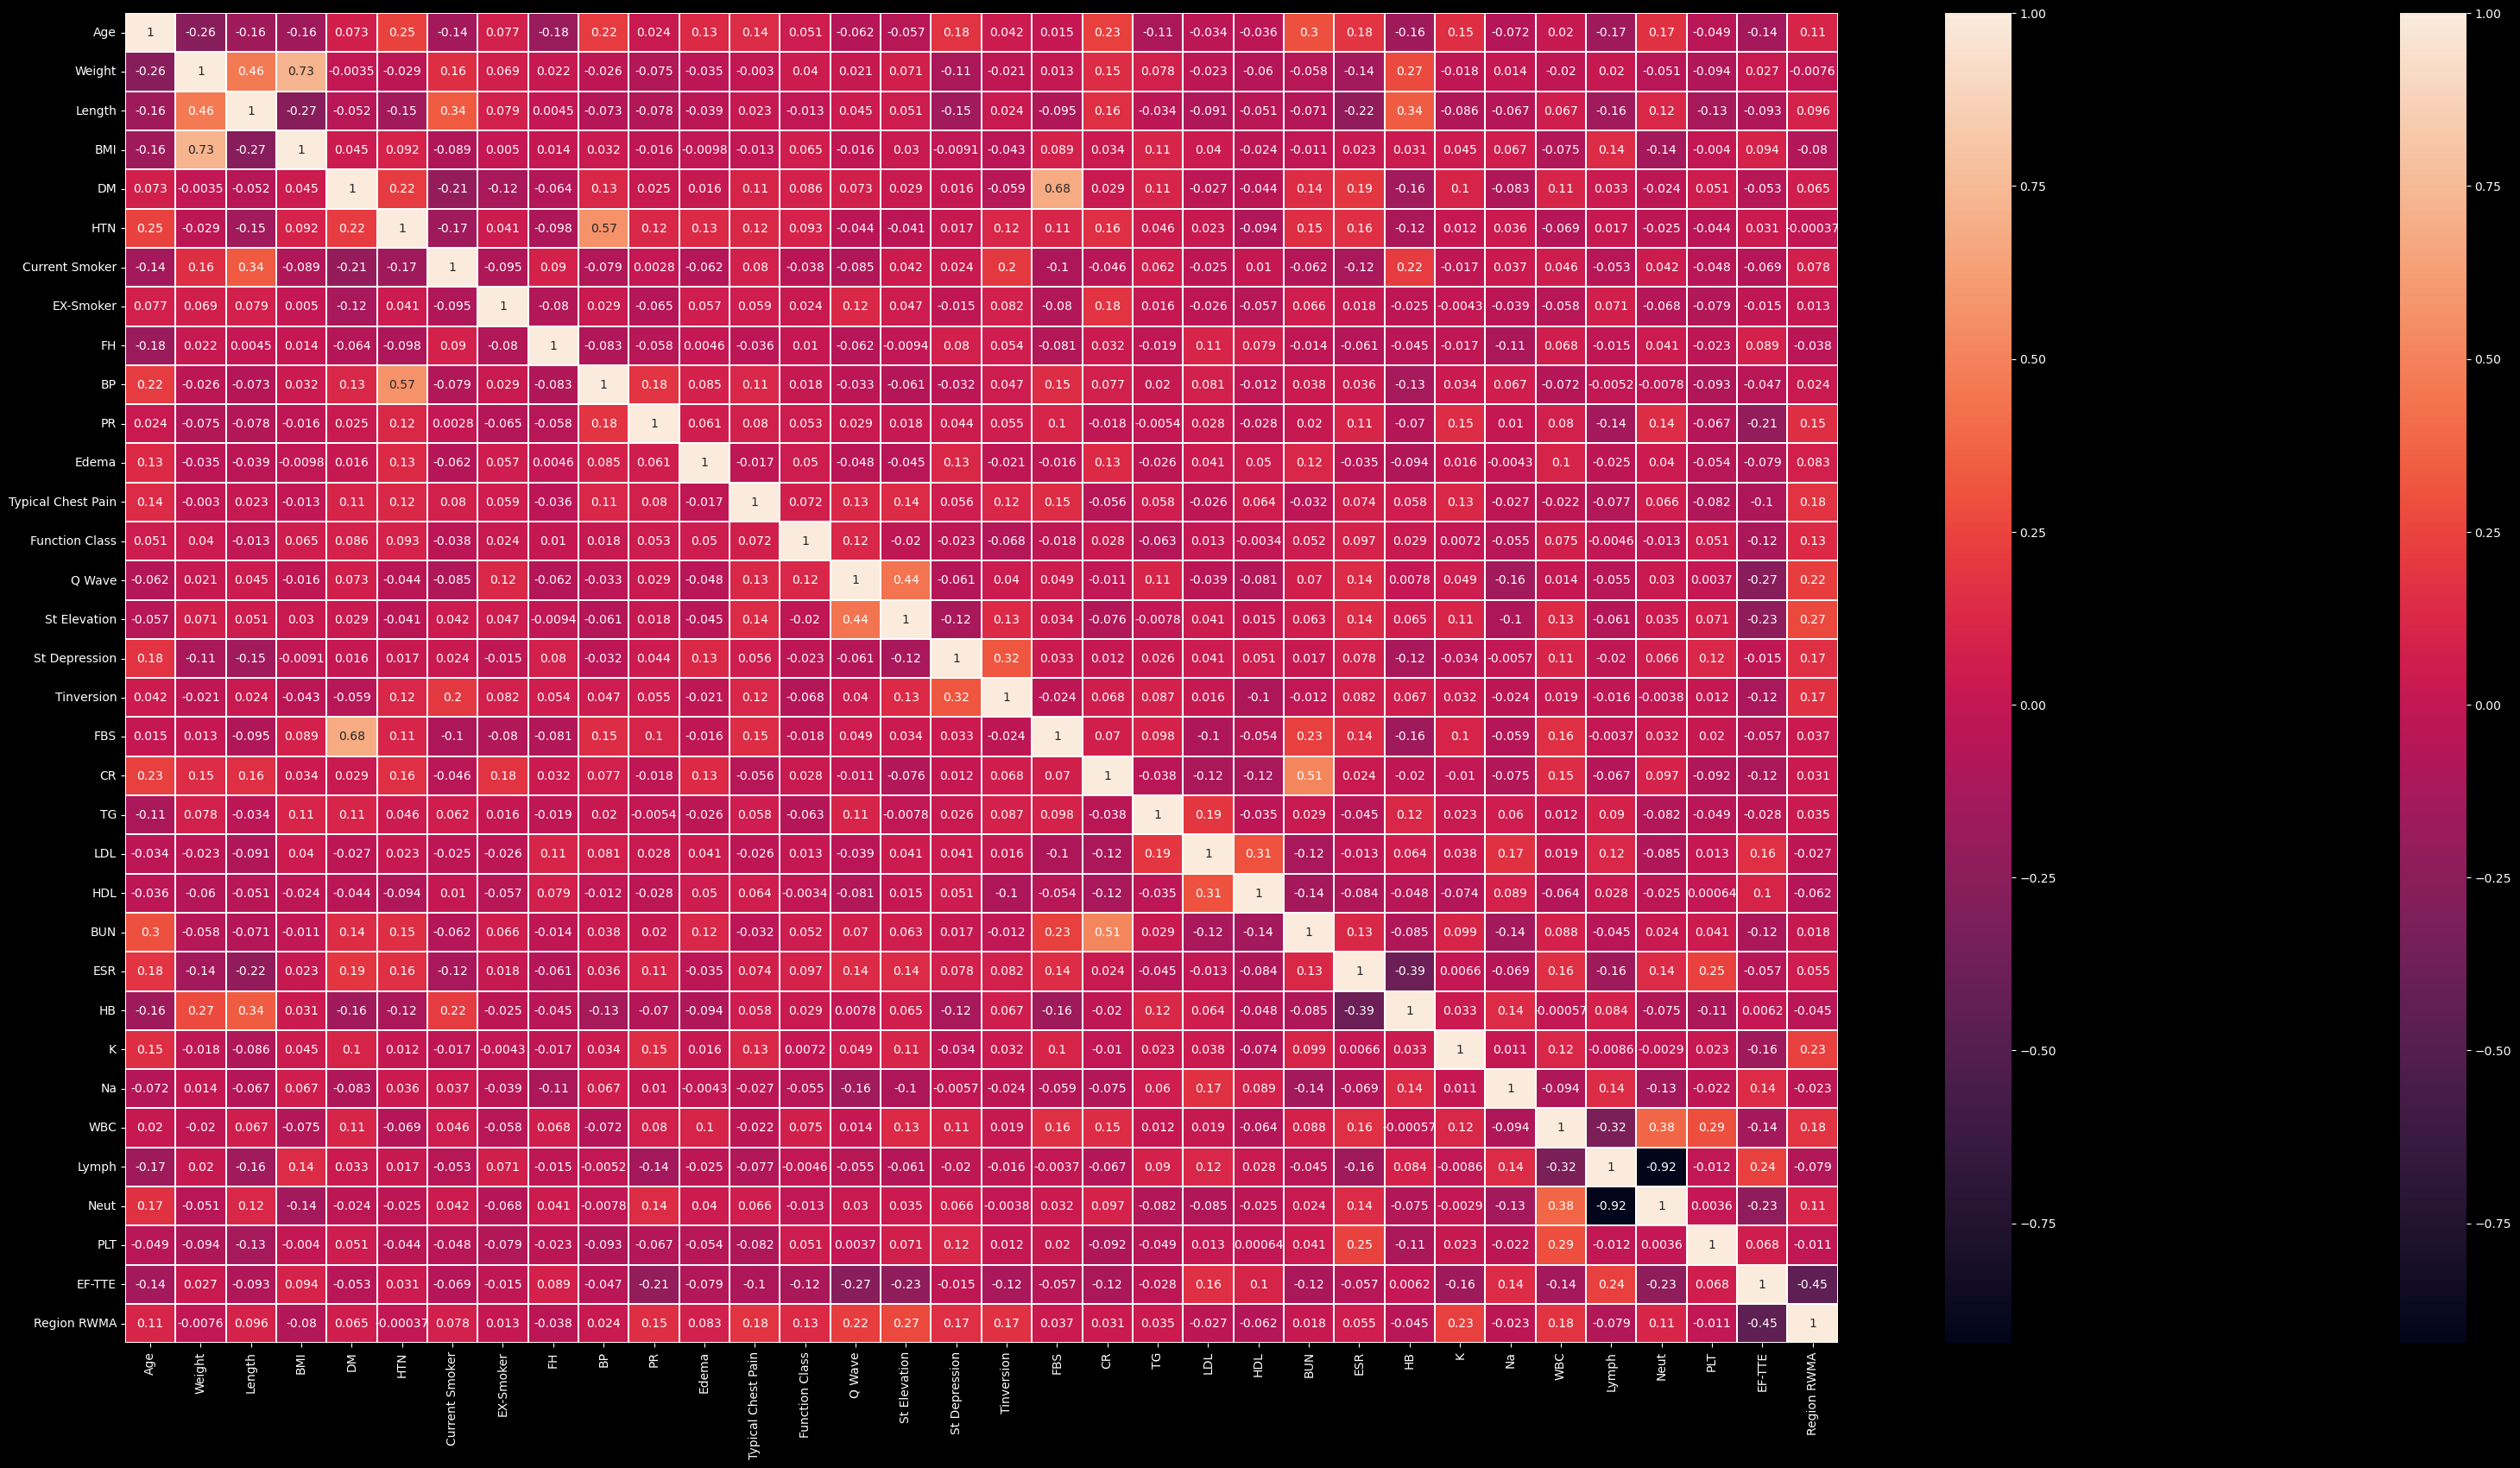

In [10]:
plt.figure(figsize=(40, 20))
sns.heatmap(dataset.corr())
top_corr_features = dataset.corr().index
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidth=.10,cmap="rocket")

C:\Users\mahmo\AppData\Local\Temp\ipykernel_3220\2397469981.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(dataset.corr())
C:\Users\mahmo\AppData\Local\Temp\ipykernel_3220\2397469981.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, linewidth=.10, mask=matrix, cmap="Paired");


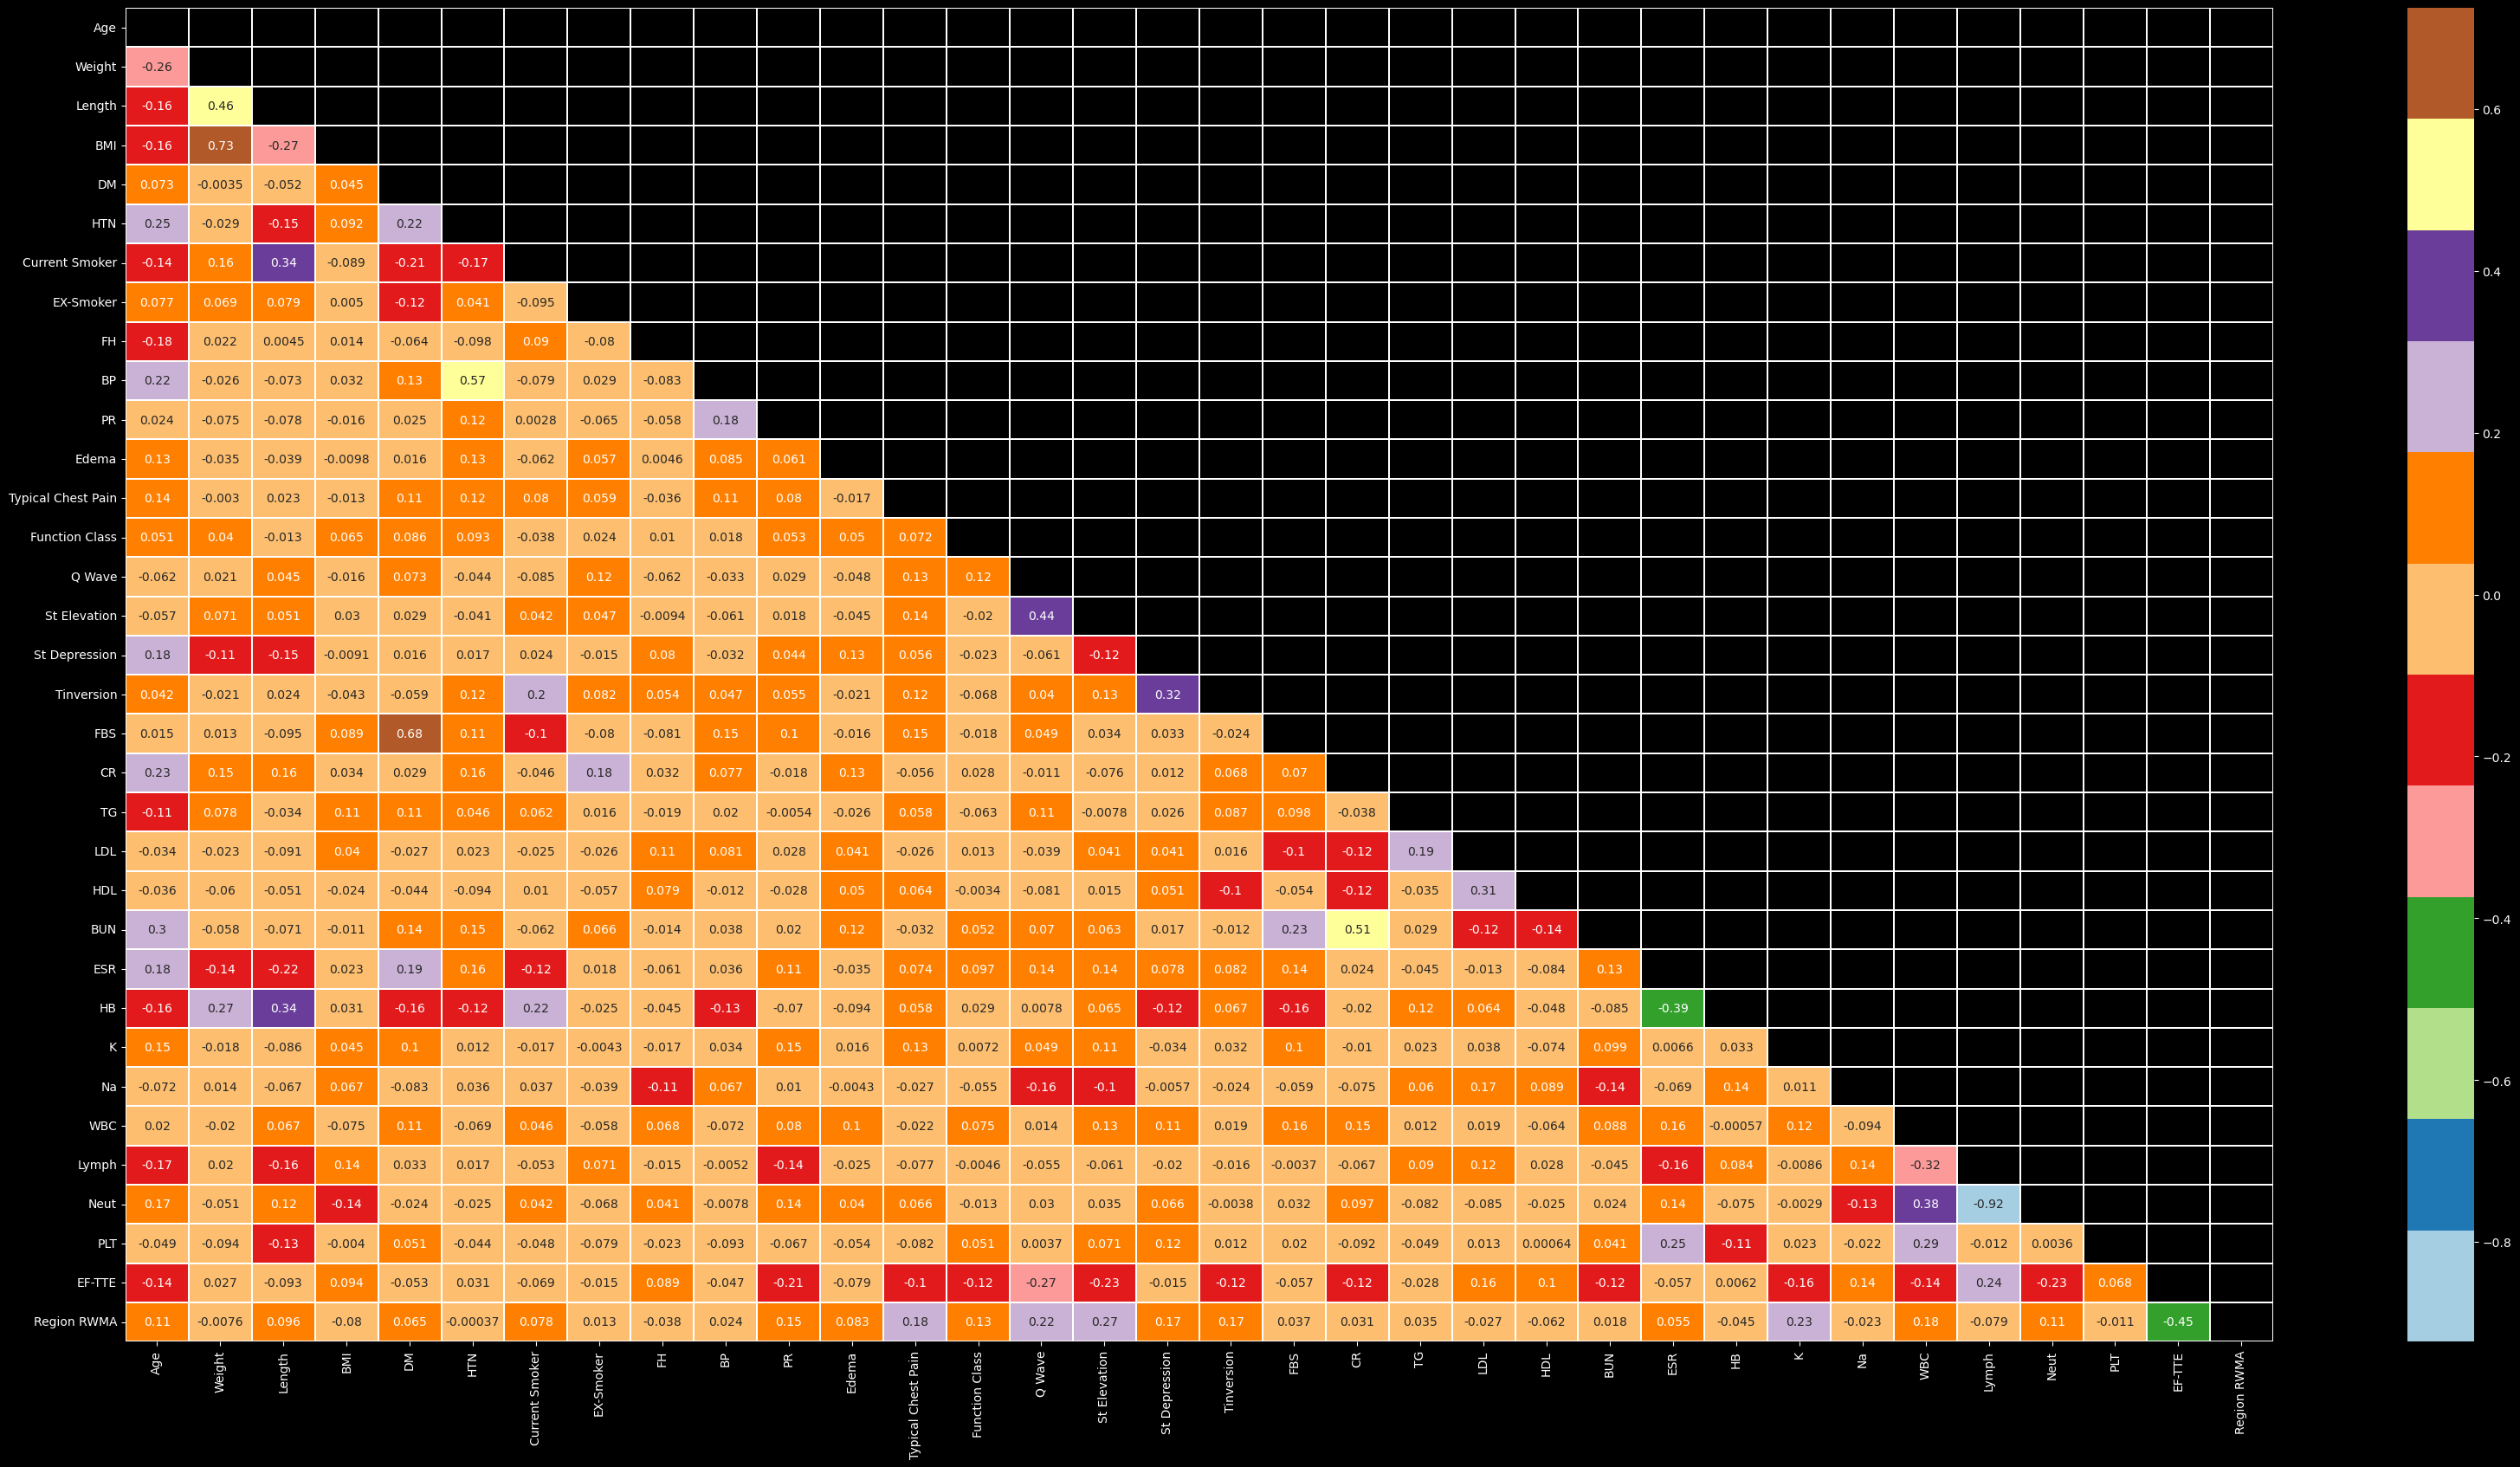

In [11]:
plt.figure(figsize=(40, 20))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, linewidth=.10, mask=matrix, cmap="Paired");

C:\Users\mahmo\AppData\Local\Temp\ipykernel_3220\3055010306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.histplot(data=dataset.corr(),kde=True,palette='hot')


<Axes: ylabel='Count'>

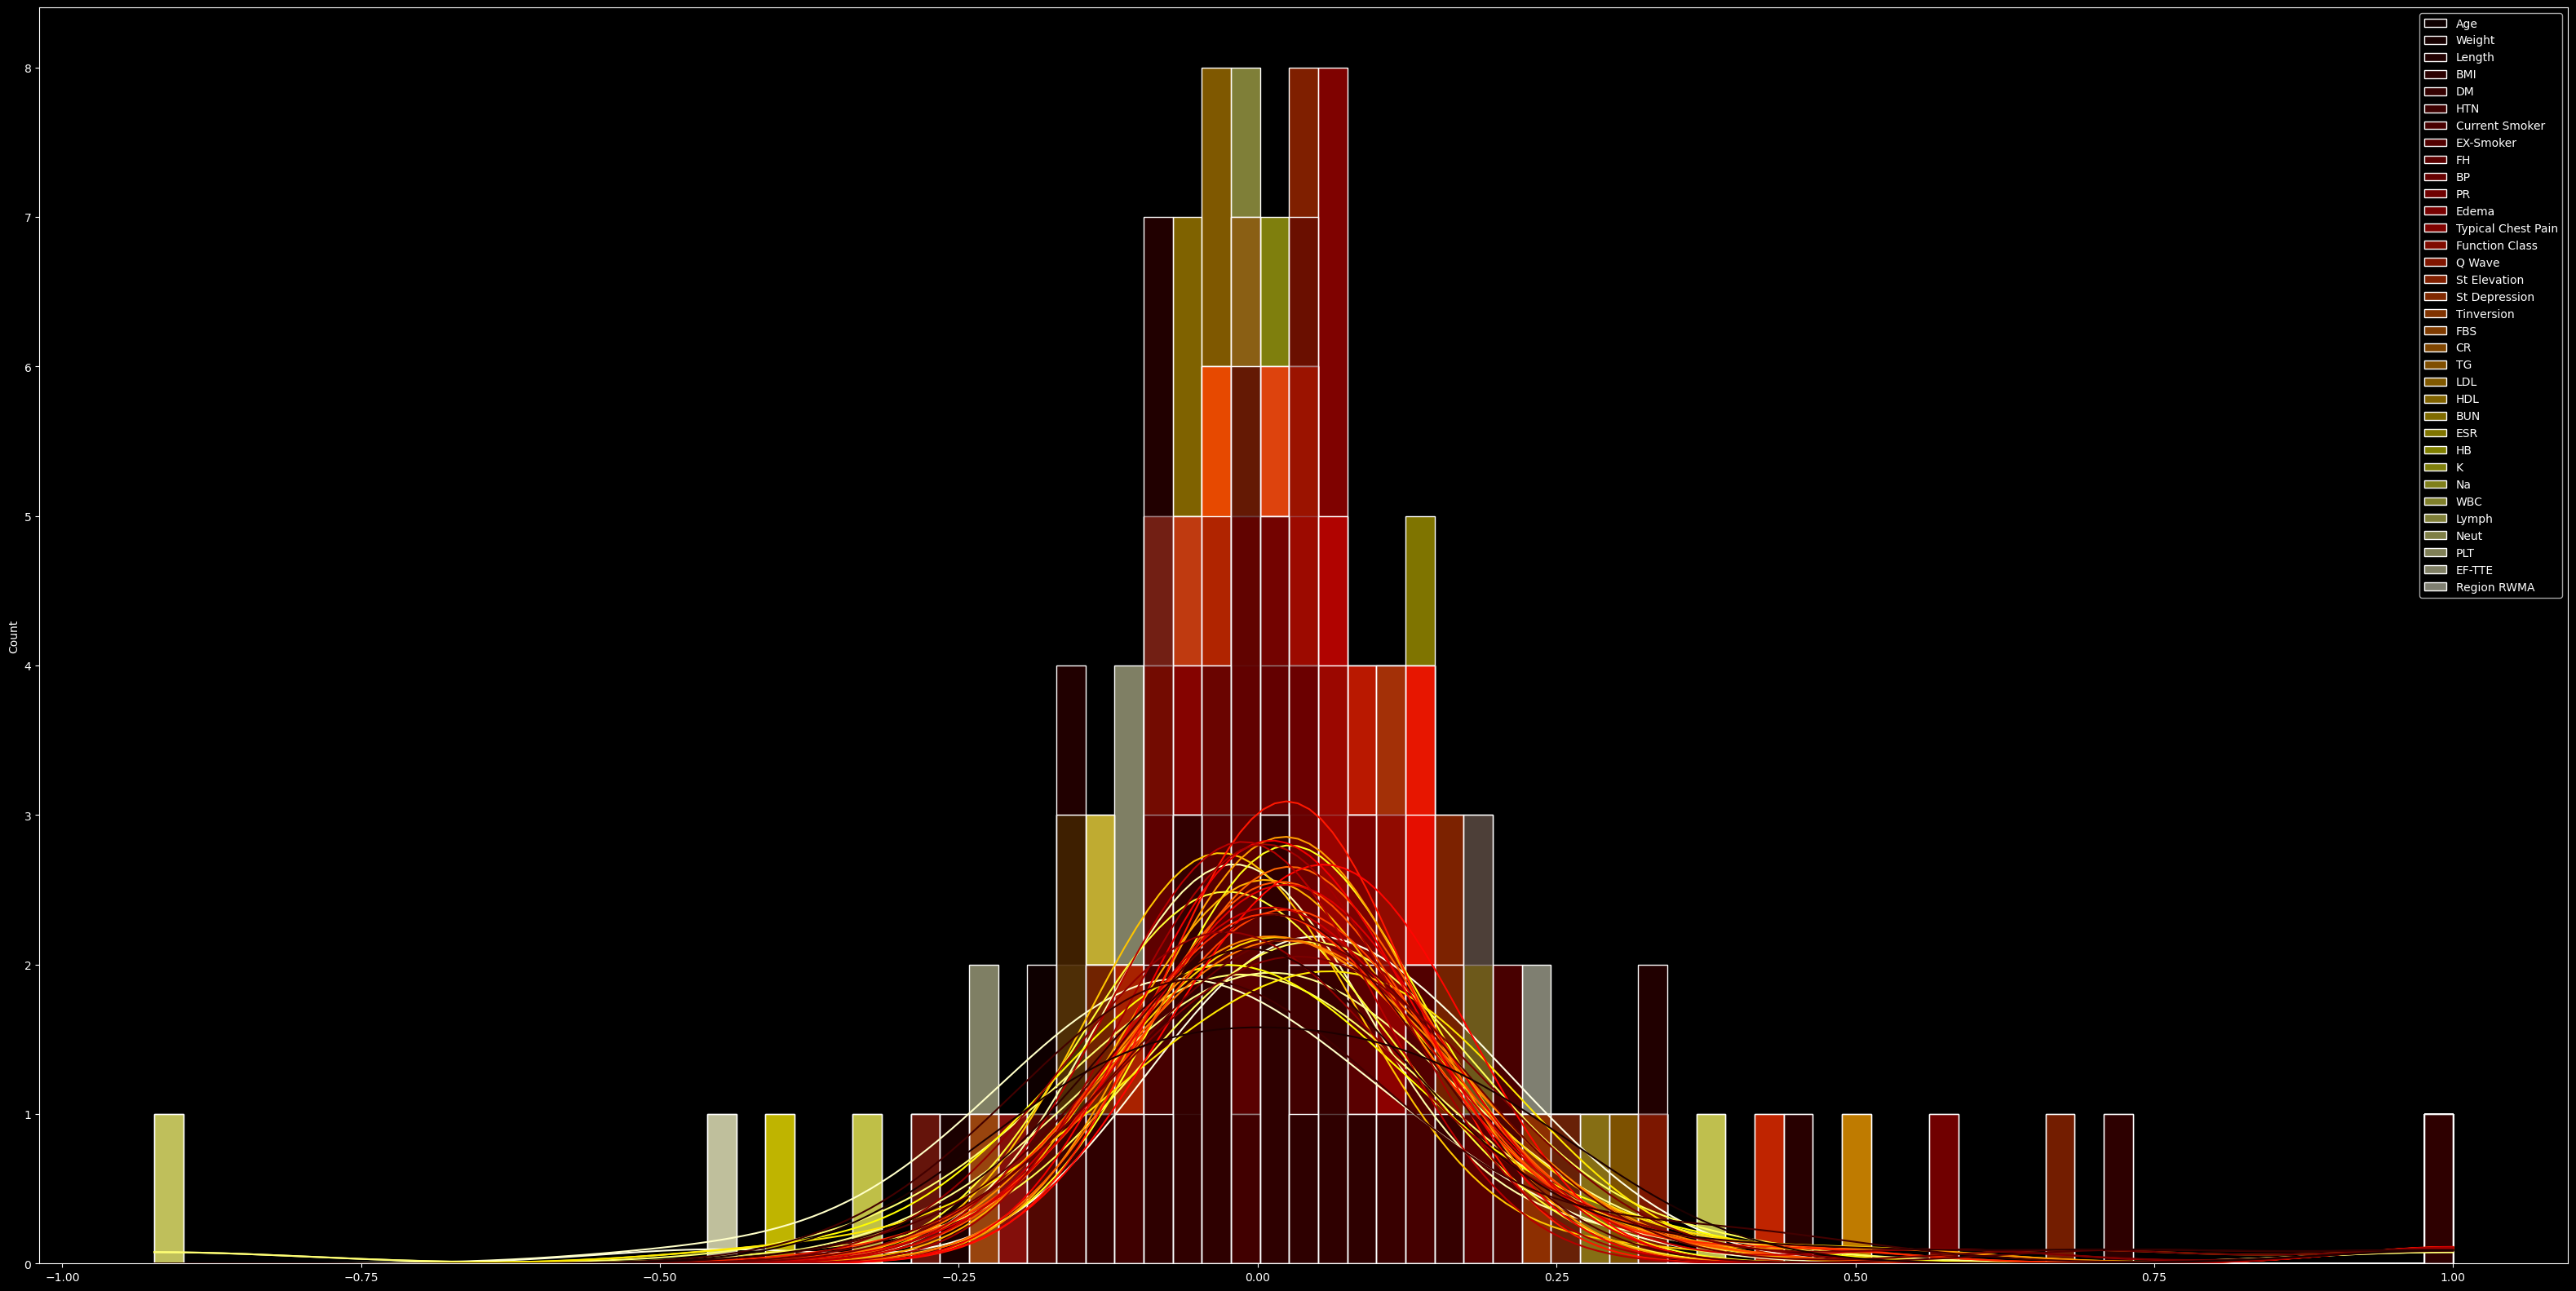

In [12]:
plt.figure(figsize=(40, 20))
sns.histplot(data=dataset.corr(),kde=True,palette='hot')

In [13]:
dataset.nunique()

Age                       46
Weight                    54
Length                    44
Sex                        2
BMI                      263
DM                         2
HTN                        2
Current Smoker             2
EX-Smoker                  2
FH                         2
Obesity                    2
CRF                        2
CVA                        2
Airway disease             2
Thyroid Disease            2
CHF                        2
DLP                        2
BP                        17
PR                        21
Edema                      2
Weak Peripheral Pulse      2
Lung rales                 2
Systolic Murmur            2
Diastolic Murmur           2
Typical Chest Pain         2
Dyspnea                    2
Function Class             4
Atypical                   2
Nonanginal                 2
Exertional CP              1
LowTH Ang                  2
Q Wave                     2
St Elevation               2
St Depression              2
Tinversion    

In [14]:
unique = pd.DataFrame(dataset.nunique())

<Axes: >

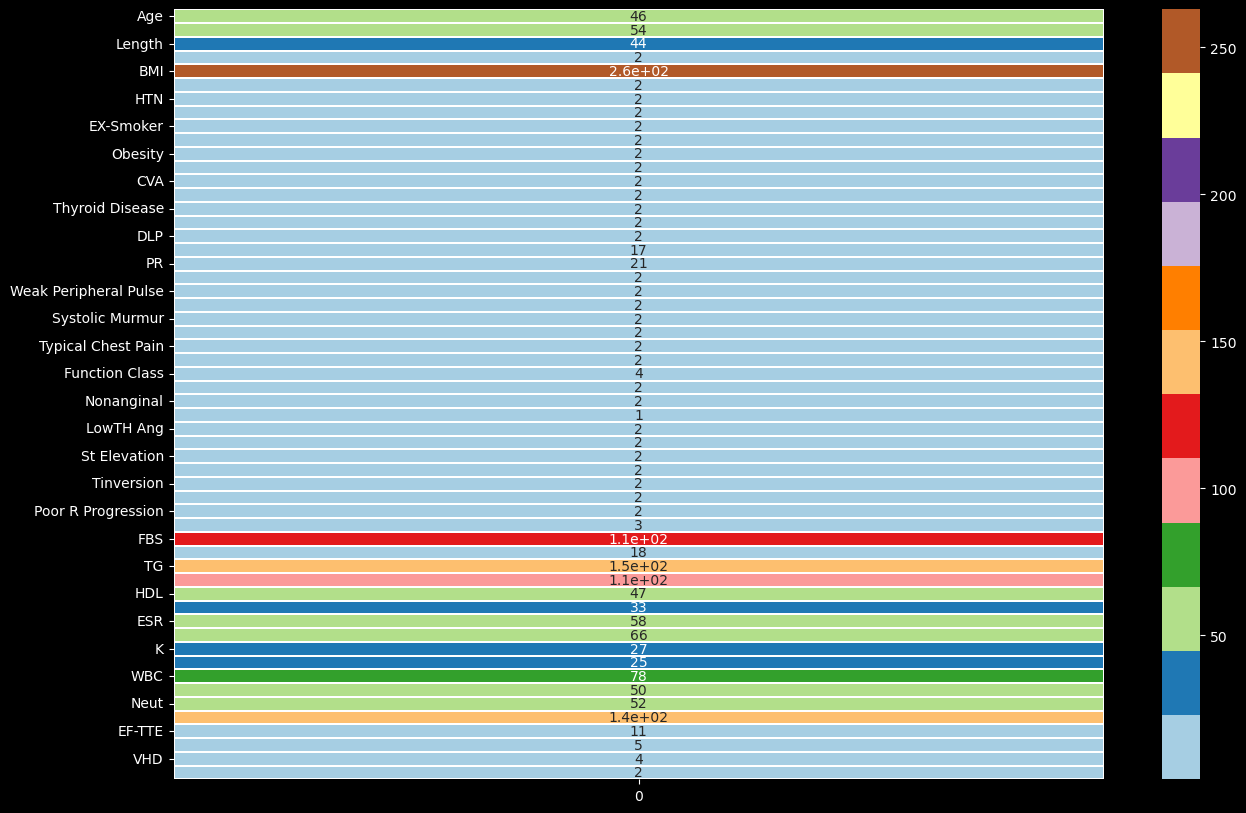

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(unique,annot=True, linewidth=.10, cmap="Paired")

# drop irrelevant data

In [16]:
dataset.drop(['Exertional CP'], axis=1, inplace=True)
dataset

Age  Weight  Length    Sex        BMI  DM  HTN  Current Smoker  \
0     53      90     175   Male  29.387755   0    1               1   
1     67      70     157  Fmale  28.398718   0    1               0   
2     54      54     164   Male  20.077335   0    0               1   
3     66      67     158  Fmale  26.838648   0    1               0   
4     50      87     153  Fmale  37.165193   0    1               0   
..   ...     ...     ...    ...        ...  ..  ...             ...   
298   58      84     168   Male  29.761905   0    0               0   
299   55      64     152  Fmale  27.700831   0    0               0   
300   48      77     160  Fmale  30.078125   0    1               0   
301   57      90     159  Fmale  35.599858   1    0               0   
302   56      85     170  Fmale  29.411765   0    1               1   

     EX-Smoker  FH  ...    K   Na    WBC Lymph Neut  PLT EF-TTE  Region RWMA  \
0            0   0  ...  4.7  141   5700    39   52  261     50            0   
1            0   0  ...  4.7  156   7700    38   55  165     40            4   
2            0   0  ...  4.7  139   7400    38   60  230     40            2   
3            0   0  ...  4.4  142  13000    18   72  742     55            0   
4            0   0  ...  4.0  140   9200    55   39  274     50            0   
..         ...  ..  ...  ...  ...    ...   ...  ...  ...    ...          ...   
298          0   0  ...  4.8  146   8500    34   58  251     45            0   
299          0   0  ...  4.0  139  11400    16   80  377     40            0   
300          0   1  ...  4.0  140   9000    35   55  279     55            0   
301          0   0  ...  3.8  141   3800    48   40  208     55            0   
302          0   0  ...  4.4  147   6000    32   55  302     55            0   

        VHD    Cath  
0         N     Cad  
1         N     Cad  
2      mild     Cad  
3    Severe  Normal  
4    Severe  Normal  
..      ...     ...  
298       N     Cad  
299    mild  Normal  
300       N  Normal  
301       N  Normal  
302       N     Cad  

[303 rows x 55 columns]

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

# Encoding Dataset

In [18]:
LE = LabelEncoder()
dataset['Sex'] = LE.fit_transform(dataset['Sex'])
dataset['Obesity'] = LE.fit_transform(dataset['Obesity'])
dataset['CRF'] = LE.fit_transform(dataset['CRF'])
dataset['CVA'] = LE.fit_transform(dataset['CVA'])
dataset['Airway disease'] = LE.fit_transform(dataset['Airway disease'])
dataset['Thyroid Disease'] = LE.fit_transform(dataset['Thyroid Disease'])
dataset['CHF'] = LE.fit_transform(dataset['CHF'])
dataset['DLP'] = LE.fit_transform(dataset['DLP'])
dataset['Weak Peripheral Pulse'] = LE.fit_transform(dataset['Weak Peripheral Pulse'])
dataset['Lung rales'] = LE.fit_transform(dataset['Lung rales'])
dataset['Systolic Murmur'] = LE.fit_transform(dataset['Systolic Murmur'])
dataset['Diastolic Murmur'] = LE.fit_transform(dataset['Diastolic Murmur'])
dataset['Dyspnea'] = LE.fit_transform(dataset['Dyspnea'])
dataset['Atypical'] = LE.fit_transform(dataset['Atypical'])
dataset['Nonanginal'] = LE.fit_transform(dataset['Nonanginal'])
dataset['LowTH Ang'] = LE.fit_transform(dataset['LowTH Ang'])
dataset['LVH'] = LE.fit_transform(dataset['LVH'])
dataset['Poor R Progression'] = LE.fit_transform(dataset['Poor R Progression'])
dataset['BBB'] = LE.fit_transform(dataset['BBB'])
dataset['VHD'] = LE.fit_transform(dataset['VHD'])
dataset['Cath'] = LE.fit_transform(dataset['Cath'])

In [19]:
dataset

Age  Weight  Length  Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0     53      90     175    1  29.387755   0    1               1          0   
1     67      70     157    0  28.398718   0    1               0          0   
2     54      54     164    1  20.077335   0    0               1          0   
3     66      67     158    0  26.838648   0    1               0          0   
4     50      87     153    0  37.165193   0    1               0          0   
..   ...     ...     ...  ...        ...  ..  ...             ...        ...   
298   58      84     168    1  29.761905   0    0               0          0   
299   55      64     152    0  27.700831   0    0               0          0   
300   48      77     160    0  30.078125   0    1               0          0   
301   57      90     159    0  35.599858   1    0               0          0   
302   56      85     170    0  29.411765   0    1               1          0   

     FH  ...    K   Na    WBC  Lymph  Neut  PLT  EF-TTE  Region RWMA  VHD  \
0     0  ...  4.7  141   5700     39    52  261      50            0    1   
1     0  ...  4.7  156   7700     38    55  165      40            4    1   
2     0  ...  4.7  139   7400     38    60  230      40            2    3   
3     0  ...  4.4  142  13000     18    72  742      55            0    2   
4     0  ...  4.0  140   9200     55    39  274      50            0    2   
..   ..  ...  ...  ...    ...    ...   ...  ...     ...          ...  ...   
298   0  ...  4.8  146   8500     34    58  251      45            0    1   
299   0  ...  4.0  139  11400     16    80  377      40            0    3   
300   1  ...  4.0  140   9000     35    55  279      55            0    1   
301   0  ...  3.8  141   3800     48    40  208      55            0    1   
302   0  ...  4.4  147   6000     32    55  302      55            0    1   

     Cath  
0       0  
1       0  
2       0  
3       1  
4       1  
..    ...  
298     0  
299     1  
300     1  
301     1  
302     0  

[303 rows x 55 columns]

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    int32  
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    int32  
 11  CRF                    303 non-null    int32  
 12  CVA                    303 non-null    int32  
 13  Airway disease         303 non-null    int32  
 14  Thyroid Disease        303 non-null    int32  
 15  CHF   

In [21]:
dataset.describe()

Age      Weight      Length         Sex         BMI          DM  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    58.897690   73.831683  164.716172    0.580858   27.248339    0.297030   
std     10.392278   11.987358    9.327661    0.494235    4.098865    0.457706   
min     30.000000   48.000000  140.000000    0.000000   18.115413    0.000000   
25%     51.000000   65.000000  158.000000    0.000000   24.514380    0.000000   
50%     58.000000   74.000000  165.000000    1.000000   26.775510    0.000000   
75%     66.000000   81.000000  171.000000    1.000000   29.411765    1.000000   
max     86.000000  120.000000  188.000000    1.000000   40.900658    1.000000   

              HTN  Current Smoker   EX-Smoker          FH  ...           K  \
count  303.000000      303.000000  303.000000  303.000000  ...  303.000000   
mean     0.590759        0.207921    0.033003    0.158416  ...    4.230693   
std      0.492507        0.406491    0.178941    0.365734  ...    0.458202   
min      0.000000        0.000000    0.000000    0.000000  ...    3.000000   
25%      0.000000        0.000000    0.000000    0.000000  ...    3.900000   
50%      1.000000        0.000000    0.000000    0.000000  ...    4.200000   
75%      1.000000        0.000000    0.000000    0.000000  ...    4.500000   
max      1.000000        1.000000    1.000000    1.000000  ...    6.600000   

               Na           WBC       Lymph        Neut         PLT  \
count  303.000000    303.000000  303.000000  303.000000  303.000000   
mean   140.996700   7562.046205   32.399340   60.148515  221.488449   
std      3.807885   2413.739323    9.972592   10.182493   60.796199   
min    128.000000   3700.000000    7.000000   32.000000   25.000000   
25%    139.000000   5800.000000   26.000000   52.500000  183.500000   
50%    141.000000   7100.000000   32.000000   60.000000  210.000000   
75%    143.000000   8800.000000   39.000000   67.000000  250.000000   
max    156.000000  18000.000000   60.000000   89.000000  742.000000   

           EF-TTE  Region RWMA         VHD        Cath  
count  303.000000   303.000000  303.000000  303.000000  
mean    47.231023     0.620462    1.930693    0.287129  
std      8.927194     1.132531    1.109180    0.453171  
min     15.000000     0.000000    0.000000    0.000000  
25%     45.000000     0.000000    1.000000    0.000000  
50%     50.000000     0.000000    2.000000    0.000000  
75%     55.000000     1.000000    3.000000    1.000000  
max     60.000000     4.000000    3.000000    1.000000  

[8 rows x 55 columns]

<Axes: >

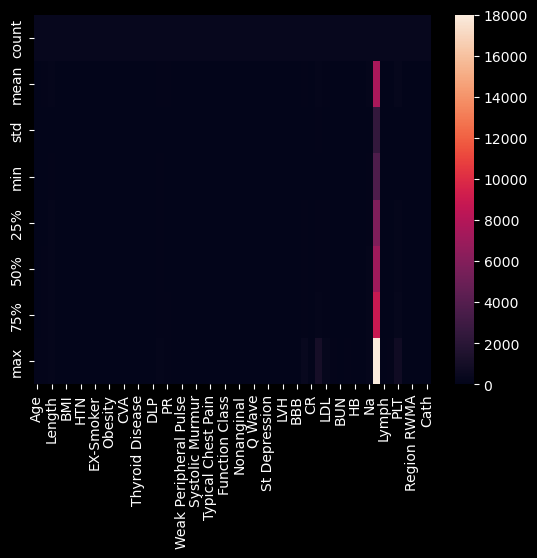

In [22]:
sns.heatmap(dataset.describe())

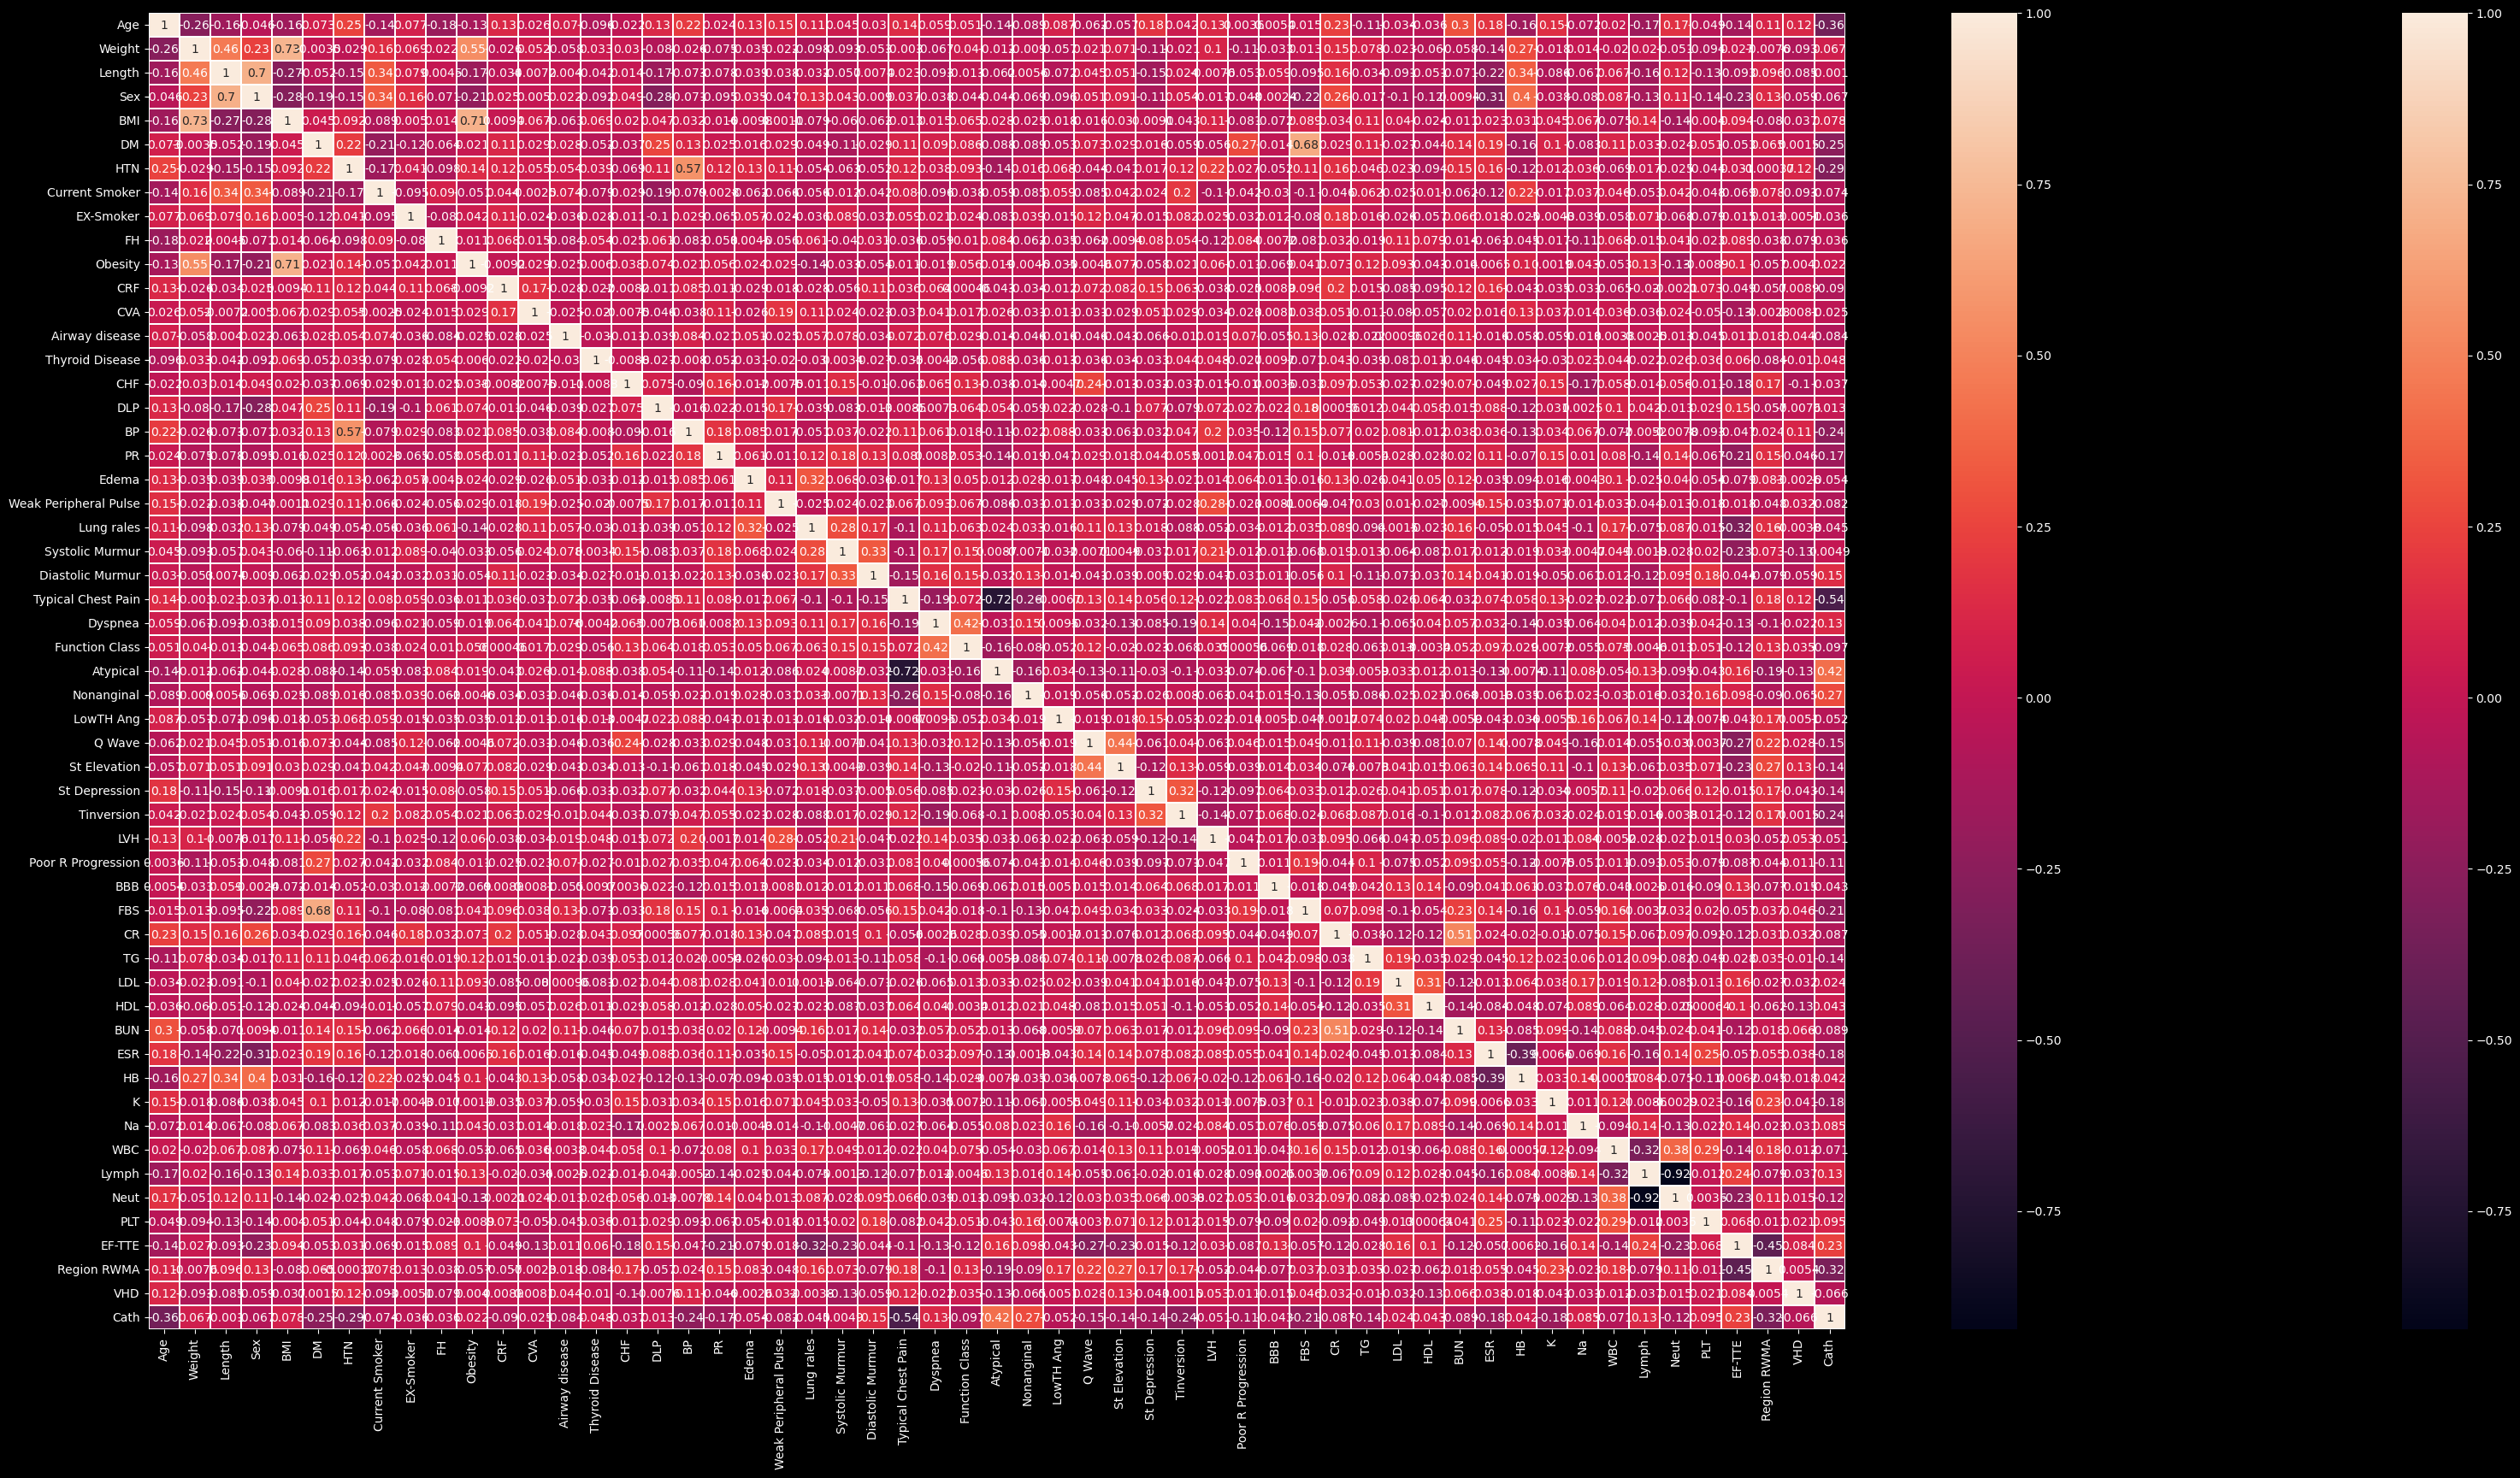

In [23]:
plt.figure(figsize=(40, 20))
sns.heatmap(dataset.corr())
top_corr_features = dataset.corr().index
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidth=.10,cmap="rocket")

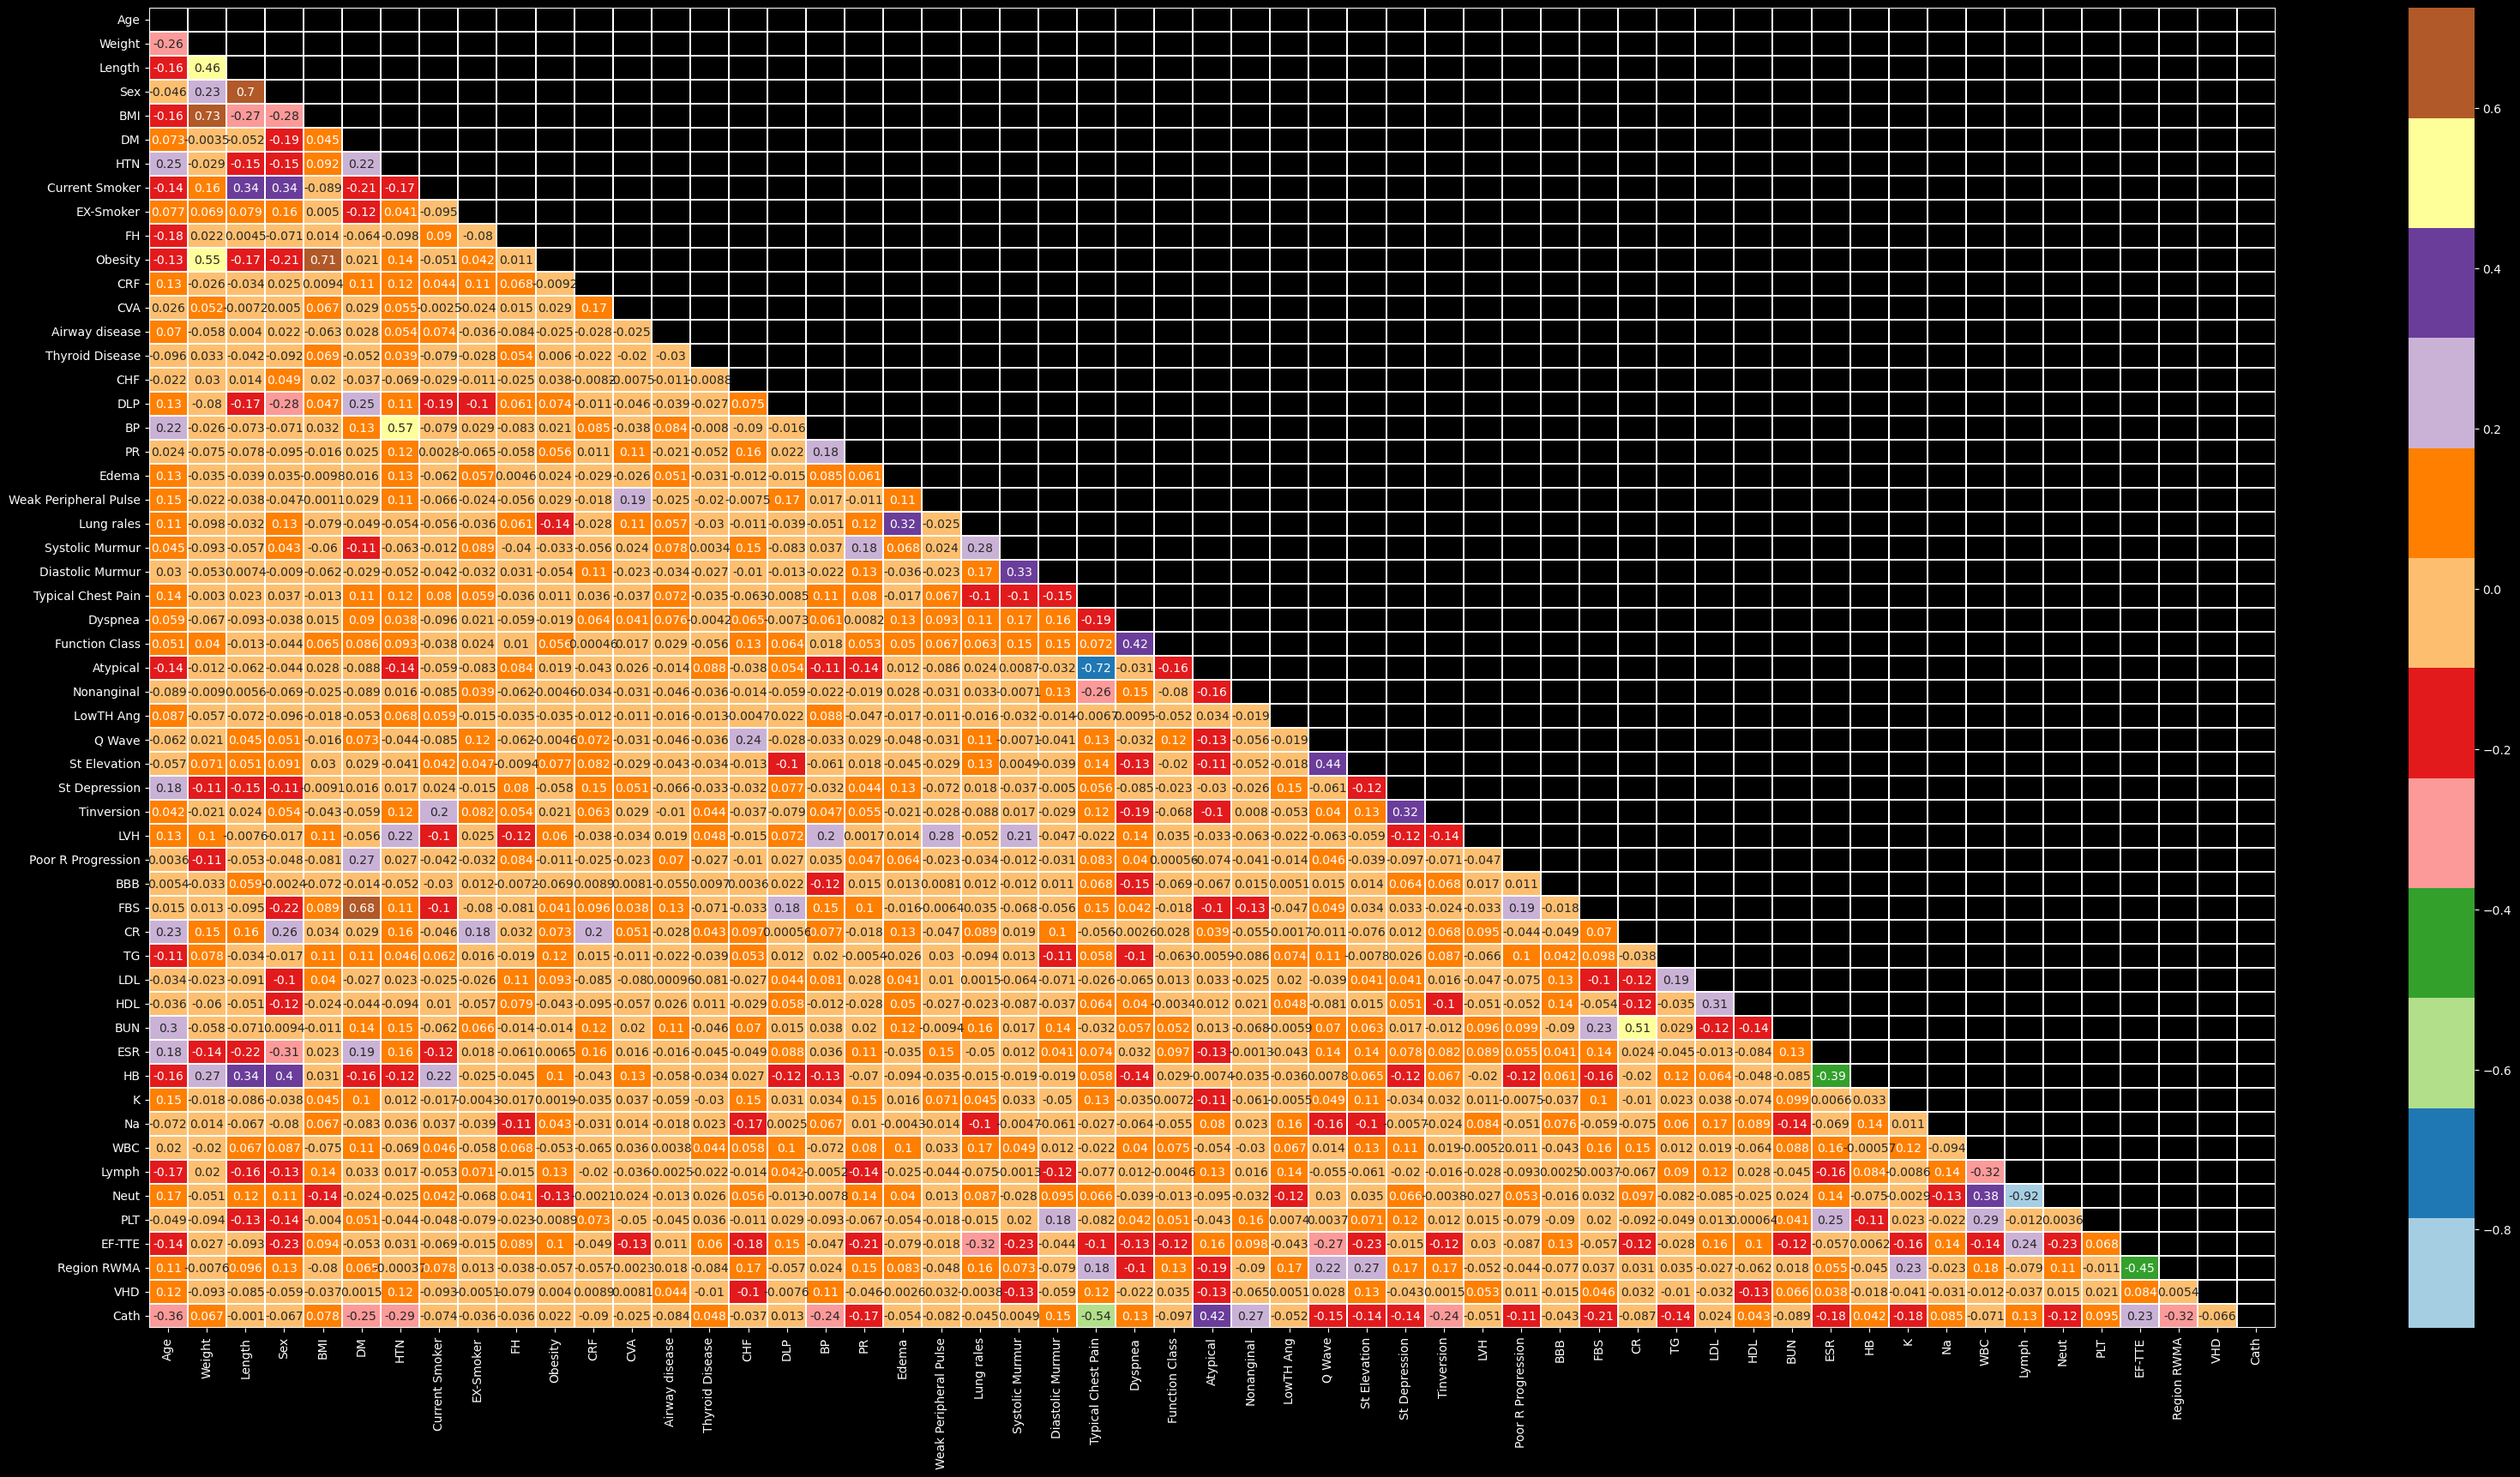

In [24]:
plt.figure(figsize=(40, 20))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, linewidth=.10, mask=matrix, cmap="Paired");

<Axes: ylabel='Count'>

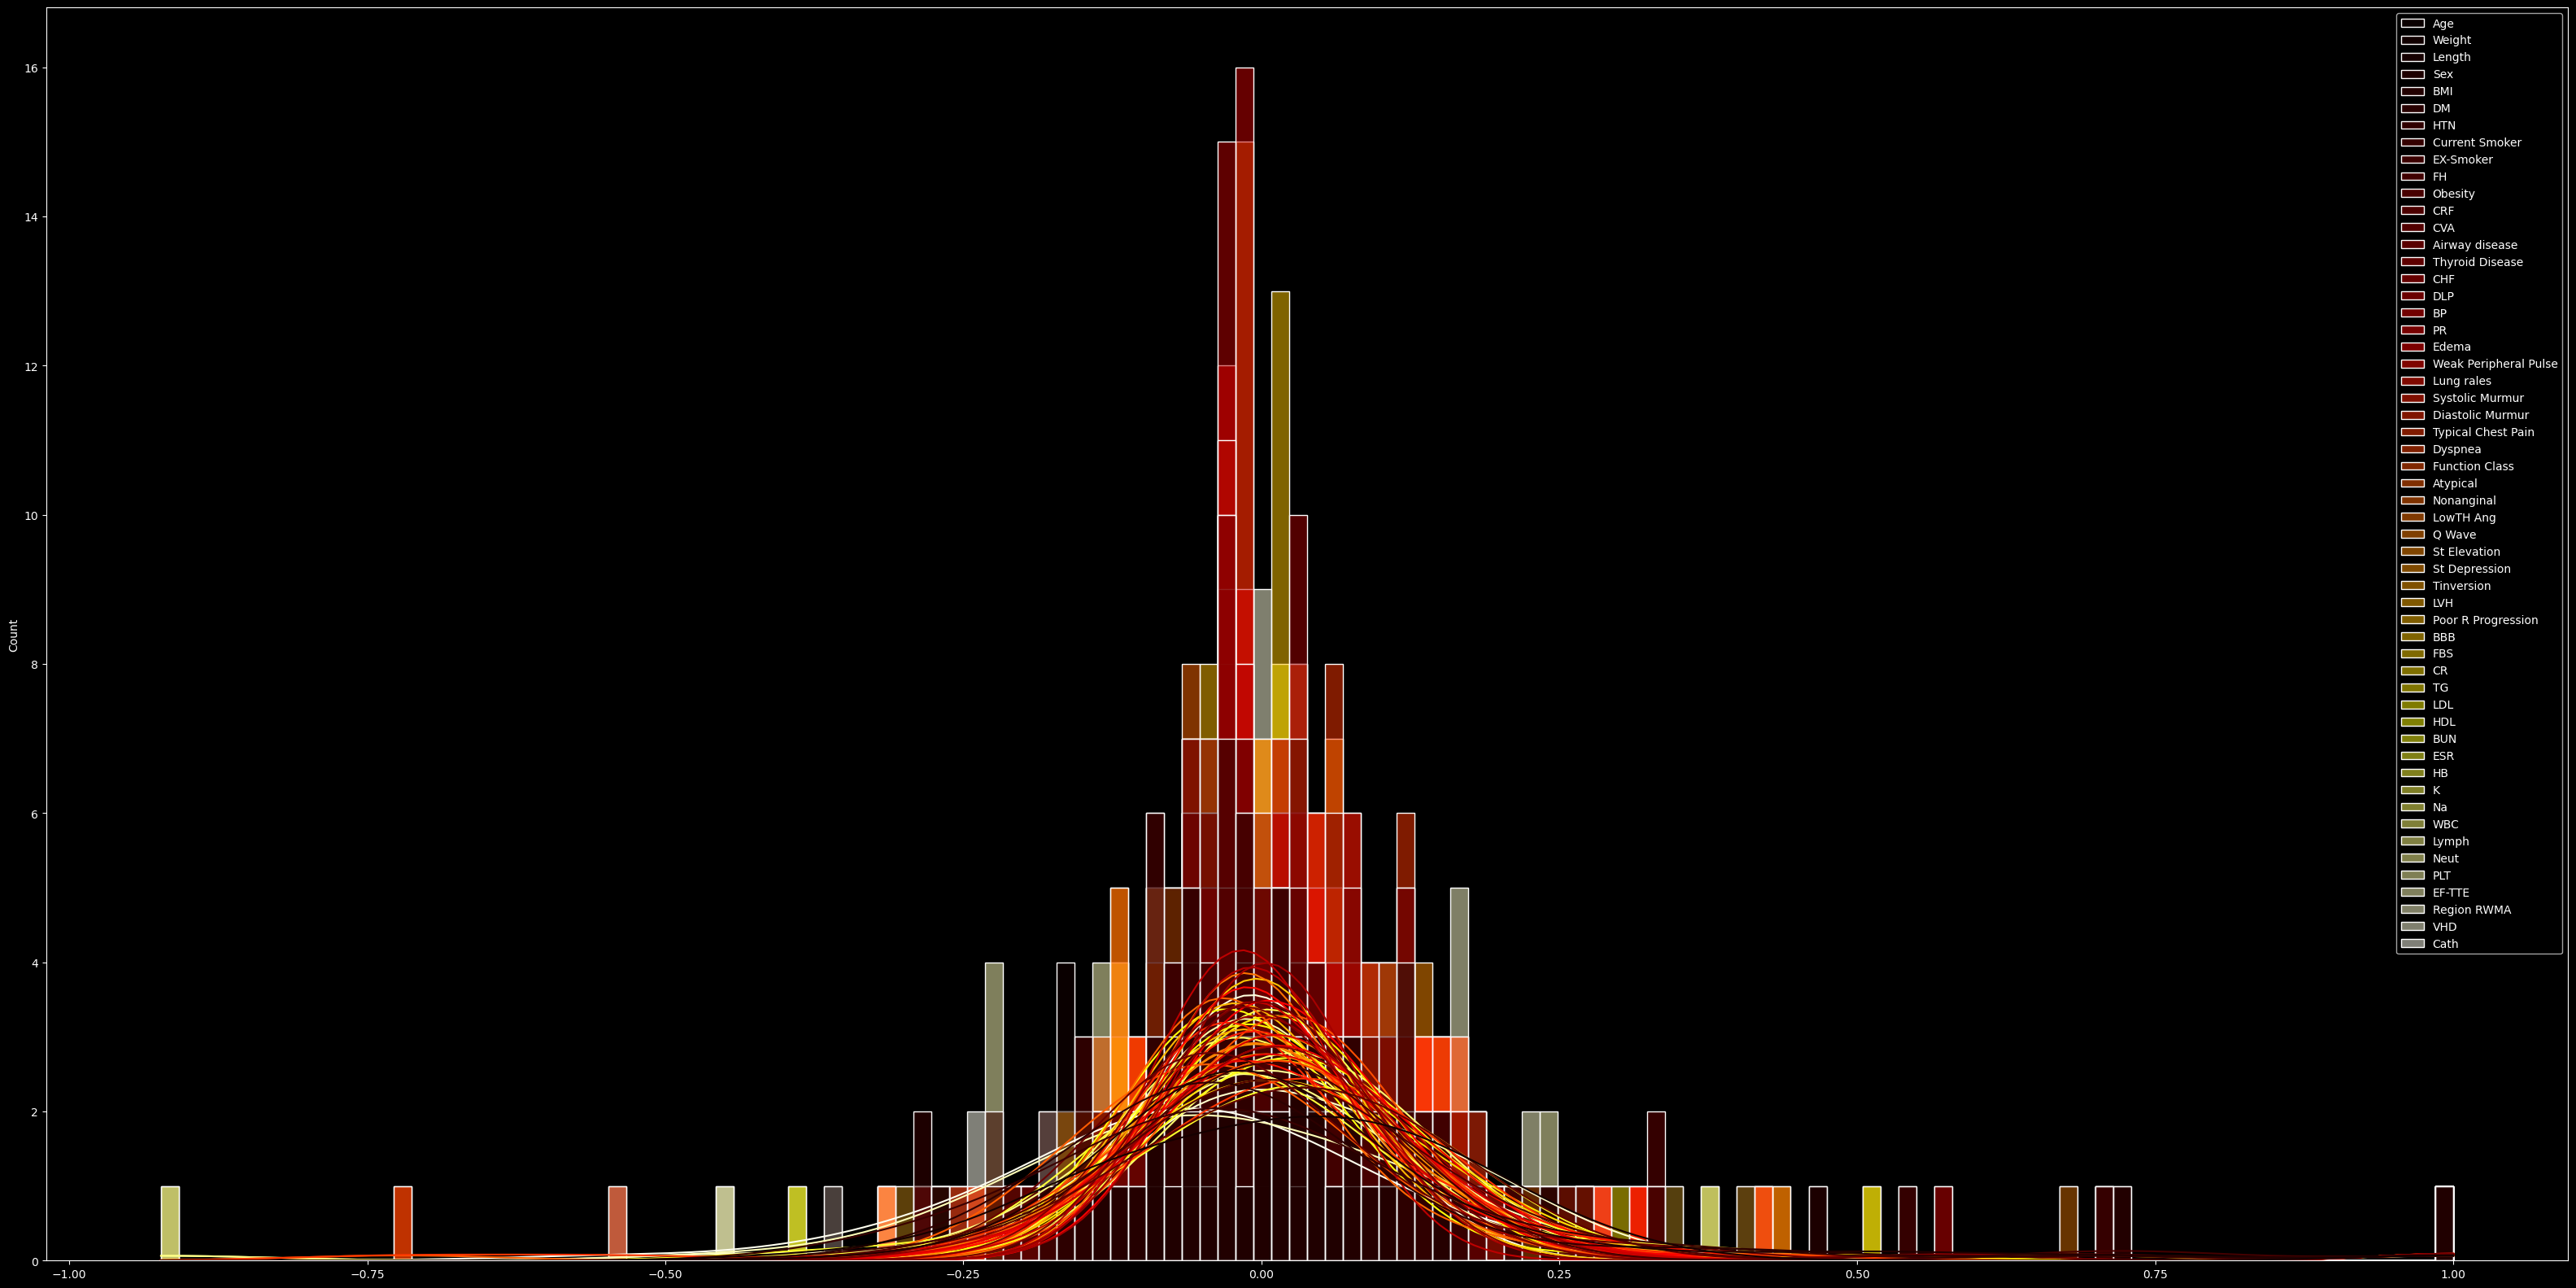

In [25]:
plt.figure(figsize=(40, 20))
sns.histplot(data=dataset.corr(),kde=True,palette='hot')

<Axes: ylabel='count'>

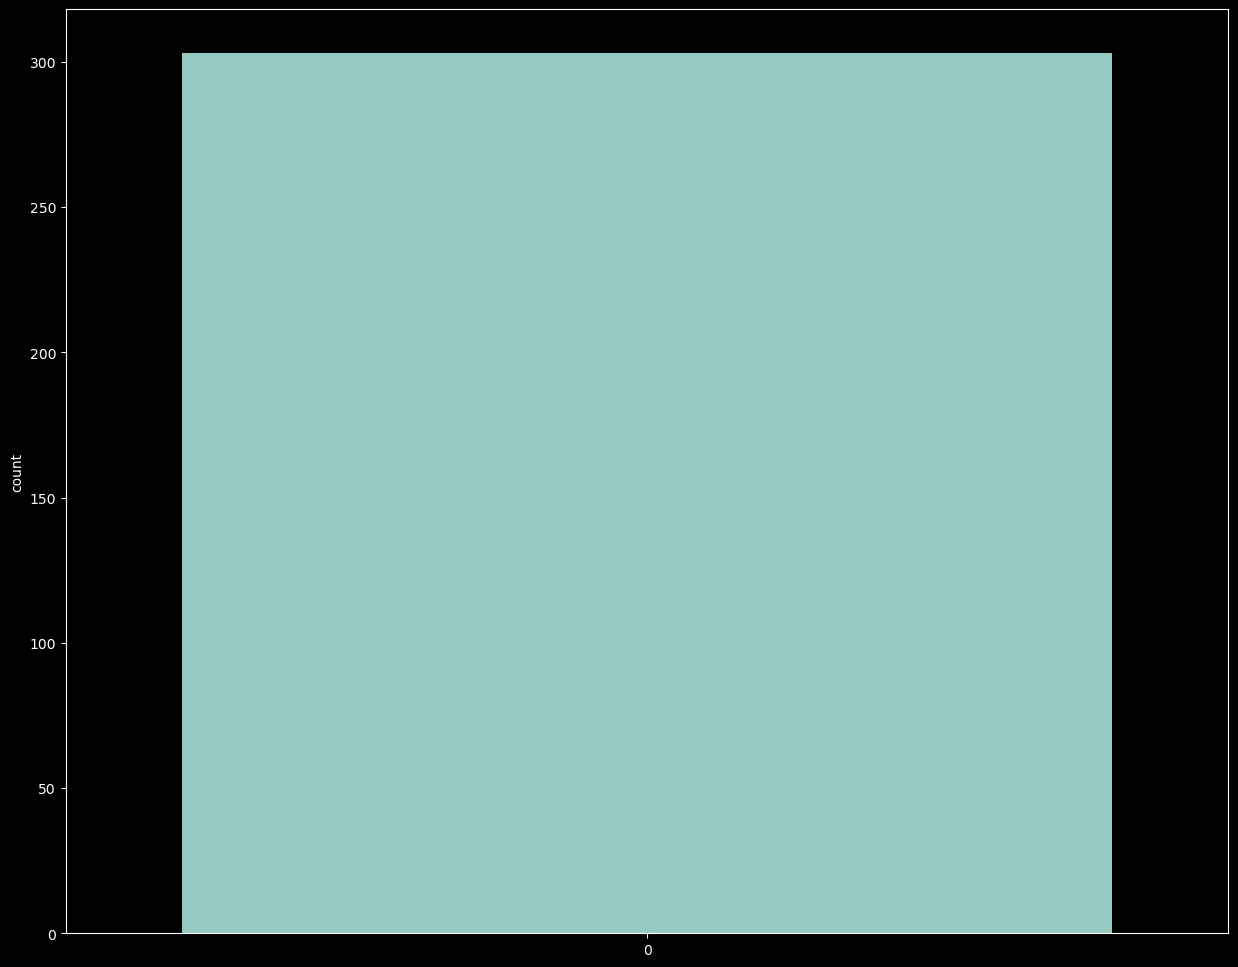

In [26]:
plt.figure(figsize=(15, 12))
sns.countplot (dataset['Age'])

<Axes: ylabel='count'>

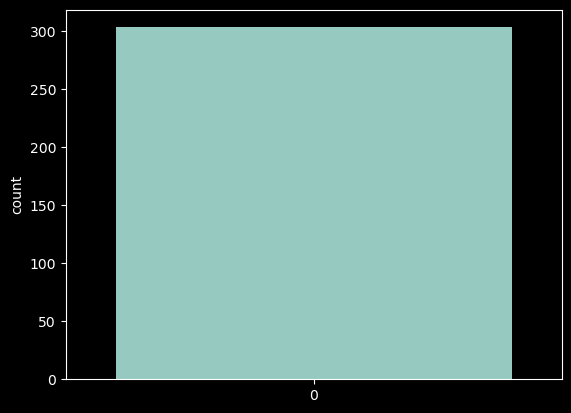

In [27]:
sns.countplot (dataset['Cath'])

# Data Scaling

In [28]:
dataset

Age  Weight  Length  Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0     53      90     175    1  29.387755   0    1               1          0   
1     67      70     157    0  28.398718   0    1               0          0   
2     54      54     164    1  20.077335   0    0               1          0   
3     66      67     158    0  26.838648   0    1               0          0   
4     50      87     153    0  37.165193   0    1               0          0   
..   ...     ...     ...  ...        ...  ..  ...             ...        ...   
298   58      84     168    1  29.761905   0    0               0          0   
299   55      64     152    0  27.700831   0    0               0          0   
300   48      77     160    0  30.078125   0    1               0          0   
301   57      90     159    0  35.599858   1    0               0          0   
302   56      85     170    0  29.411765   0    1               1          0   

     FH  ...    K   Na    WBC  Lymph  Neut  PLT  EF-TTE  Region RWMA  VHD  \
0     0  ...  4.7  141   5700     39    52  261      50            0    1   
1     0  ...  4.7  156   7700     38    55  165      40            4    1   
2     0  ...  4.7  139   7400     38    60  230      40            2    3   
3     0  ...  4.4  142  13000     18    72  742      55            0    2   
4     0  ...  4.0  140   9200     55    39  274      50            0    2   
..   ..  ...  ...  ...    ...    ...   ...  ...     ...          ...  ...   
298   0  ...  4.8  146   8500     34    58  251      45            0    1   
299   0  ...  4.0  139  11400     16    80  377      40            0    3   
300   1  ...  4.0  140   9000     35    55  279      55            0    1   
301   0  ...  3.8  141   3800     48    40  208      55            0    1   
302   0  ...  4.4  147   6000     32    55  302      55            0    1   

     Cath  
0       0  
1       0  
2       0  
3       1  
4       1  
..    ...  
298     0  
299     1  
300     1  
301     1  
302     0  

[303 rows x 55 columns]

In [29]:
dataset = np.array(dataset)
dataset

array([[ 53.,  90., 175., ...,   0.,   1.,   0.],
       [ 67.,  70., 157., ...,   4.,   1.,   0.],
       [ 54.,  54., 164., ...,   2.,   3.,   0.],
       ...,
       [ 48.,  77., 160., ...,   0.,   1.,   1.],
       [ 57.,  90., 159., ...,   0.,   1.,   1.],
       [ 56.,  85., 170., ...,   0.,   1.,   0.]])

In [30]:
SC = StandardScaler()
dataset[:,0:3] = SC.fit_transform(dataset[:,0:3])
dataset[:,4:5] = SC.fit_transform(dataset[:,4:5])
dataset[:,17:19] = SC.fit_transform(dataset[:,17:19])
dataset[:,37:38] = SC.fit_transform(dataset[:,37:38])
dataset[:,39:53] = SC.fit_transform(dataset[:,39:53])
dataset

array([[-0.56844576,  1.35101196,  1.10433259, ..., -0.54876069,
         1.        ,  0.        ],
       [ 0.78093696, -0.32017246, -0.82860385, ...,  2.98899442,
         1.        ,  0.        ],
       [-0.47206128, -1.65712   , -0.07690635, ...,  1.22011686,
         3.        ,  0.        ],
       ...,
       [-1.05036816,  0.26474209, -0.50644778, ..., -0.54876069,
         1.        ,  1.        ],
       [-0.18290784,  1.35101196, -0.61383314, ..., -0.54876069,
         1.        ,  1.        ],
       [-0.27929232,  0.93321586,  0.5674058 , ..., -0.54876069,
         1.        ,  0.        ]])

In [31]:
dataset = pd.DataFrame(dataset,columns = ['Age' , 'Weight' ,'Length', 'Sex' , 'BMI' ,'DM', 'HTN' , 'Current Smoker', 'EX-Smoker' , 'FH' , 'Obesity' , 
                                      'CRF','CVA','Airway disease','Thyroid Disease','CHF' , 'DLP' ,'BP', 'PR','Edema' , 'Weak Peripheral Pulse' , 
                                      'Lung rales' , 'Systolic Murmur' , 'Diastolic Murmur','Typical Chest Pain'  , 'Dyspnea' , 
                                      'Function Class' ,'Atypical', 'Nonanginal' , 'LowTH Ang' ,'Q Wave' , 'St Elevation' , 'St Depression' , 
                                      'Tinversion' , 'LVH' , 'Poor R Progression' , 'BBB' ,'FBS' , 'CR' , 'TG' , 'LDL' , 'HDL' , 'BUN' , 'ESR' , 
                                      'HB' , 'K' , 'Na' , 'WBC' , 'Lymph' , 'Neut' ,'PLT' , 'EF-TTE' , 'Region RWMA' , 'VHD','Cath'])
dataset

Age    Weight    Length  Sex       BMI   DM  HTN  Current Smoker  \
0   -0.568446  1.351012  1.104333  1.0  0.522817  0.0  1.0             1.0   
1    0.780937 -0.320172 -0.828604  0.0  0.281122  0.0  1.0             0.0   
2   -0.472061 -1.657120 -0.076906  1.0 -1.752404  0.0  0.0             1.0   
3    0.684552 -0.570850 -0.721218  0.0 -0.100118  0.0  1.0             0.0   
4   -0.857599  1.100334 -1.258145  0.0  2.423417  0.0  1.0             0.0   
..        ...       ...       ...  ...       ...  ...  ...             ...   
298 -0.086523  0.849657  0.352635  1.0  0.614249  0.0  0.0             0.0   
299 -0.375677 -0.821528 -1.365531  0.0  0.110577  0.0  0.0             0.0   
300 -1.050368  0.264742 -0.506448  0.0  0.691525  0.0  1.0             0.0   
301 -0.182908  1.351012 -0.613833  0.0  2.040890  1.0  0.0             0.0   
302 -0.279292  0.933216  0.567406  0.0  0.528684  0.0  1.0             1.0   

     EX-Smoker   FH  ...         K        Na       WBC     Lymph      Neut  \
0          0.0  0.0  ...  1.025931  0.000868 -0.772712  0.662975 -0.801571   
1          0.0  0.0  ...  1.025931  3.946579  0.057248  0.562534 -0.506461   
2          0.0  0.0  ...  1.025931 -0.525227 -0.067246  0.562534 -0.014609   
3          0.0  0.0  ...  0.370114  0.263916  2.256644 -1.446280  1.165833   
4          0.0  0.0  ... -0.504308 -0.262179  0.679719  2.270027 -2.080384   
..         ...  ...  ...       ...       ...       ...       ...       ...   
298        0.0  0.0  ...  1.244536  1.316105  0.389232  0.160771 -0.211350   
299        0.0  0.0  ... -0.504308 -0.525227  1.592675 -1.647161  1.952795   
300        0.0  1.0  ... -0.504308 -0.262179  0.596722  0.261212 -0.506461   
301        0.0  0.0  ... -0.941519  0.000868 -1.561175  1.566942 -1.982014   
302        0.0  0.0  ...  0.370114  1.579153 -0.648218 -0.040110 -0.506461   

          PLT    EF-TTE  Region RWMA  VHD  Cath  
0    0.650977  0.310686    -0.548761  1.0   0.0  
1   -0.930681 -0.811339     2.988994  1.0   0.0  
2    0.140233 -0.811339     1.220117  3.0   0.0  
3    8.575744  0.871699    -0.548761  2.0   1.0  
4    0.865160  0.310686    -0.548761  2.0   1.0  
..        ...       ...          ...  ...   ...  
298  0.486221 -0.250327    -0.548761  1.0   0.0  
299  2.562147 -0.811339    -0.548761  3.0   1.0  
300  0.947538  0.871699    -0.548761  1.0   1.0  
301 -0.222230  0.871699    -0.548761  1.0   1.0  
302  1.326477  0.871699    -0.548761  1.0   0.0  

[303 rows x 55 columns]

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    float64
 1   Weight                 303 non-null    float64
 2   Length                 303 non-null    float64
 3   Sex                    303 non-null    float64
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    float64
 6   HTN                    303 non-null    float64
 7   Current Smoker         303 non-null    float64
 8   EX-Smoker              303 non-null    float64
 9   FH                     303 non-null    float64
 10  Obesity                303 non-null    float64
 11  CRF                    303 non-null    float64
 12  CVA                    303 non-null    float64
 13  Airway disease         303 non-null    float64
 14  Thyroid Disease        303 non-null    float64
 15  CHF   

In [33]:
dataset.describe()

Age        Weight        Length         Sex           BMI  \
count  3.030000e+02  3.030000e+02  3.030000e+02  303.000000  3.030000e+02   
mean   1.524267e-16  2.169149e-16  1.105093e-15    0.580858 -2.579528e-16   
std    1.001654e+00  1.001654e+00  1.001654e+00    0.494235  1.001654e+00   
min   -2.785289e+00 -2.158475e+00 -2.654155e+00    0.000000 -2.231846e+00   
25%   -7.612147e-01 -7.379686e-01 -7.212185e-01    0.000000 -6.681072e-01   
50%   -8.652336e-02  1.406442e-02  3.047901e-02    1.000000 -1.155468e-01   
75%    6.845525e-01  5.989790e-01  6.747912e-01    1.000000  5.286841e-01   
max    2.612242e+00  3.857789e+00  2.500342e+00    1.000000  3.336266e+00   

               DM         HTN  Current Smoker   EX-Smoker          FH  ...  \
count  303.000000  303.000000      303.000000  303.000000  303.000000  ...   
mean     0.297030    0.590759        0.207921    0.033003    0.158416  ...   
std      0.457706    0.492507        0.406491    0.178941    0.365734  ...   
min      0.000000    0.000000        0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000        0.000000    0.000000    0.000000  ...   
50%      0.000000    1.000000        0.000000    0.000000    0.000000  ...   
75%      1.000000    1.000000        0.000000    0.000000    0.000000  ...   
max      1.000000    1.000000        1.000000    1.000000    1.000000  ...   

                  K            Na           WBC         Lymph          Neut  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1.442191e-15 -1.008361e-15 -5.862564e-18  3.576164e-16  2.345026e-16   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.690363e+00 -3.418748e+00 -1.602673e+00 -2.551128e+00 -2.768976e+00   
25%   -7.229132e-01 -5.252266e-01 -7.312145e-01 -6.427543e-01 -7.523862e-01   
50%   -6.709674e-02  8.681432e-04 -1.917401e-01 -4.010999e-02 -1.460944e-02   
75%    5.887198e-01  5.269629e-01  5.137264e-01  6.629750e-01  6.739822e-01   
max    5.179435e+00  3.946579e+00  4.331545e+00  2.772230e+00  2.838127e+00   

                PLT        EF-TTE   Region RWMA         VHD        Cath  
count  3.030000e+02  3.030000e+02  3.030000e+02  303.000000  303.000000  
mean  -1.172513e-17 -5.862564e-17 -2.345026e-17    1.930693    0.287129  
std    1.001654e+00  1.001654e+00  1.001654e+00    1.109180    0.453171  
min   -3.237266e+00 -3.616404e+00 -5.487607e-01    0.000000    0.000000  
25%   -6.258827e-01 -2.503266e-01 -5.487607e-01    1.000000    0.000000  
50%   -1.892792e-01  3.106864e-01 -5.487607e-01    2.000000    0.000000  
75%    4.697451e-01  8.716993e-01  3.356781e-01    3.000000    1.000000  
max    8.575744e+00  1.432712e+00  2.988994e+00    3.000000    1.000000  

[8 rows x 55 columns]

In [34]:
dataset.corr()

Age    Weight    Length       Sex       BMI  \
Age                    1.000000 -0.264585 -0.163753 -0.045769 -0.161414   
Weight                -0.264585  1.000000  0.460631  0.234529  0.725005   
Length                -0.163753  0.460631  1.000000  0.700279 -0.269356   
Sex                   -0.045769  0.234529  0.700279  1.000000 -0.284088   
BMI                   -0.161414  0.725005 -0.269356 -0.284088  1.000000   
DM                     0.072543 -0.003531 -0.052318 -0.194348  0.045360   
HTN                    0.246690 -0.028532 -0.153668 -0.149278  0.091652   
Current Smoker        -0.143879  0.157385  0.335248  0.336330 -0.089398   
EX-Smoker              0.076608  0.068977  0.079034  0.156932  0.005016   
FH                    -0.183900  0.021963  0.004488 -0.071098  0.014045   
Obesity               -0.126190  0.547267 -0.171962 -0.211808  0.712501   
CRF                    0.126980 -0.025713 -0.033826  0.024718  0.009386   
CVA                    0.026247  0.051610 -0.007180  0.005025  0.066967   
Airway disease         0.069941 -0.057719  0.004021  0.021834 -0.062781   
Thyroid Disease       -0.095886  0.033370 -0.042495 -0.091986  0.068834   
CHF                   -0.021618  0.029659  0.014113  0.048881  0.020205   
DLP                    0.128147 -0.080068 -0.173428 -0.277911  0.046570   
BP                     0.215527 -0.025930 -0.072511 -0.071315  0.031916   
PR                     0.023576 -0.075468 -0.077549 -0.095459 -0.015680   
Edema                  0.132487 -0.035323 -0.039241  0.035315 -0.009812   
Weak Peripheral Pulse  0.153593 -0.021990 -0.037781 -0.047479 -0.001103   
Lung rales             0.105655 -0.097527 -0.031980  0.129113 -0.079006   
Systolic Murmur        0.044819 -0.092795 -0.057362  0.042723 -0.059971   
Diastolic Murmur       0.029832 -0.052770  0.007420 -0.008972 -0.062039   
Typical Chest Pain     0.138387 -0.002986  0.023149  0.036770 -0.012911   
Dyspnea                0.059379 -0.067434 -0.092743 -0.038180  0.015020   
Function Class         0.051424  0.040371 -0.012710 -0.043835  0.064736   
Atypical              -0.141722 -0.012166 -0.061937 -0.043794  0.028345   
Nonanginal            -0.088702 -0.009010  0.005612 -0.068600 -0.025488   
LowTH Ang              0.087227 -0.056749 -0.071919 -0.095959 -0.018212   
Q Wave                -0.061677  0.020584  0.045229  0.051031 -0.015837   
St Elevation          -0.056926  0.071406  0.050602  0.091379  0.029896   
St Depression          0.177432 -0.114619 -0.150480 -0.114342 -0.009146   
Tinversion             0.041913 -0.021033  0.023690  0.054493 -0.043311   
LVH                    0.125612  0.100367 -0.007599 -0.016626  0.110330   
Poor R Progression     0.003599 -0.106376 -0.053120 -0.048372 -0.081253   
BBB                    0.005434 -0.033420  0.058785 -0.002436 -0.072387   
FBS                    0.015385  0.012737 -0.094789 -0.217349  0.089380   
CR                     0.227097  0.150226  0.162634  0.260150  0.034338   
TG                    -0.110793  0.078469 -0.034389 -0.016784  0.109422   
LDL                   -0.033576 -0.023233 -0.090970 -0.104153  0.040001   
HDL                   -0.035793 -0.059713 -0.050594 -0.116294 -0.024338   
BUN                    0.300663 -0.057670 -0.071229  0.009351 -0.011139   
ESR                    0.183127 -0.139314 -0.222182 -0.306189  0.023259   
HB                    -0.161018  0.274218  0.341028  0.403496  0.031107   
K                      0.154203 -0.018287 -0.086277 -0.038046  0.044587   
Na                    -0.071886  0.013916 -0.066590 -0.079913  0.067402   
WBC                    0.020398 -0.020214  0.066658  0.086823 -0.074928   
Lymph                 -0.171529  0.020120 -0.156436 -0.132539  0.139583   
Neut                   0.173030 -0.051093  0.115075  0.112422 -0.140037   
PLT                   -0.049500 -0.094192 -0.133446 -0.143698 -0.003964   
EF-TTE                -0.140512  0.026789 -0.093295 -0.230896  0.093903   
Region RWMA            0.108663 -0.007648  0.095715  

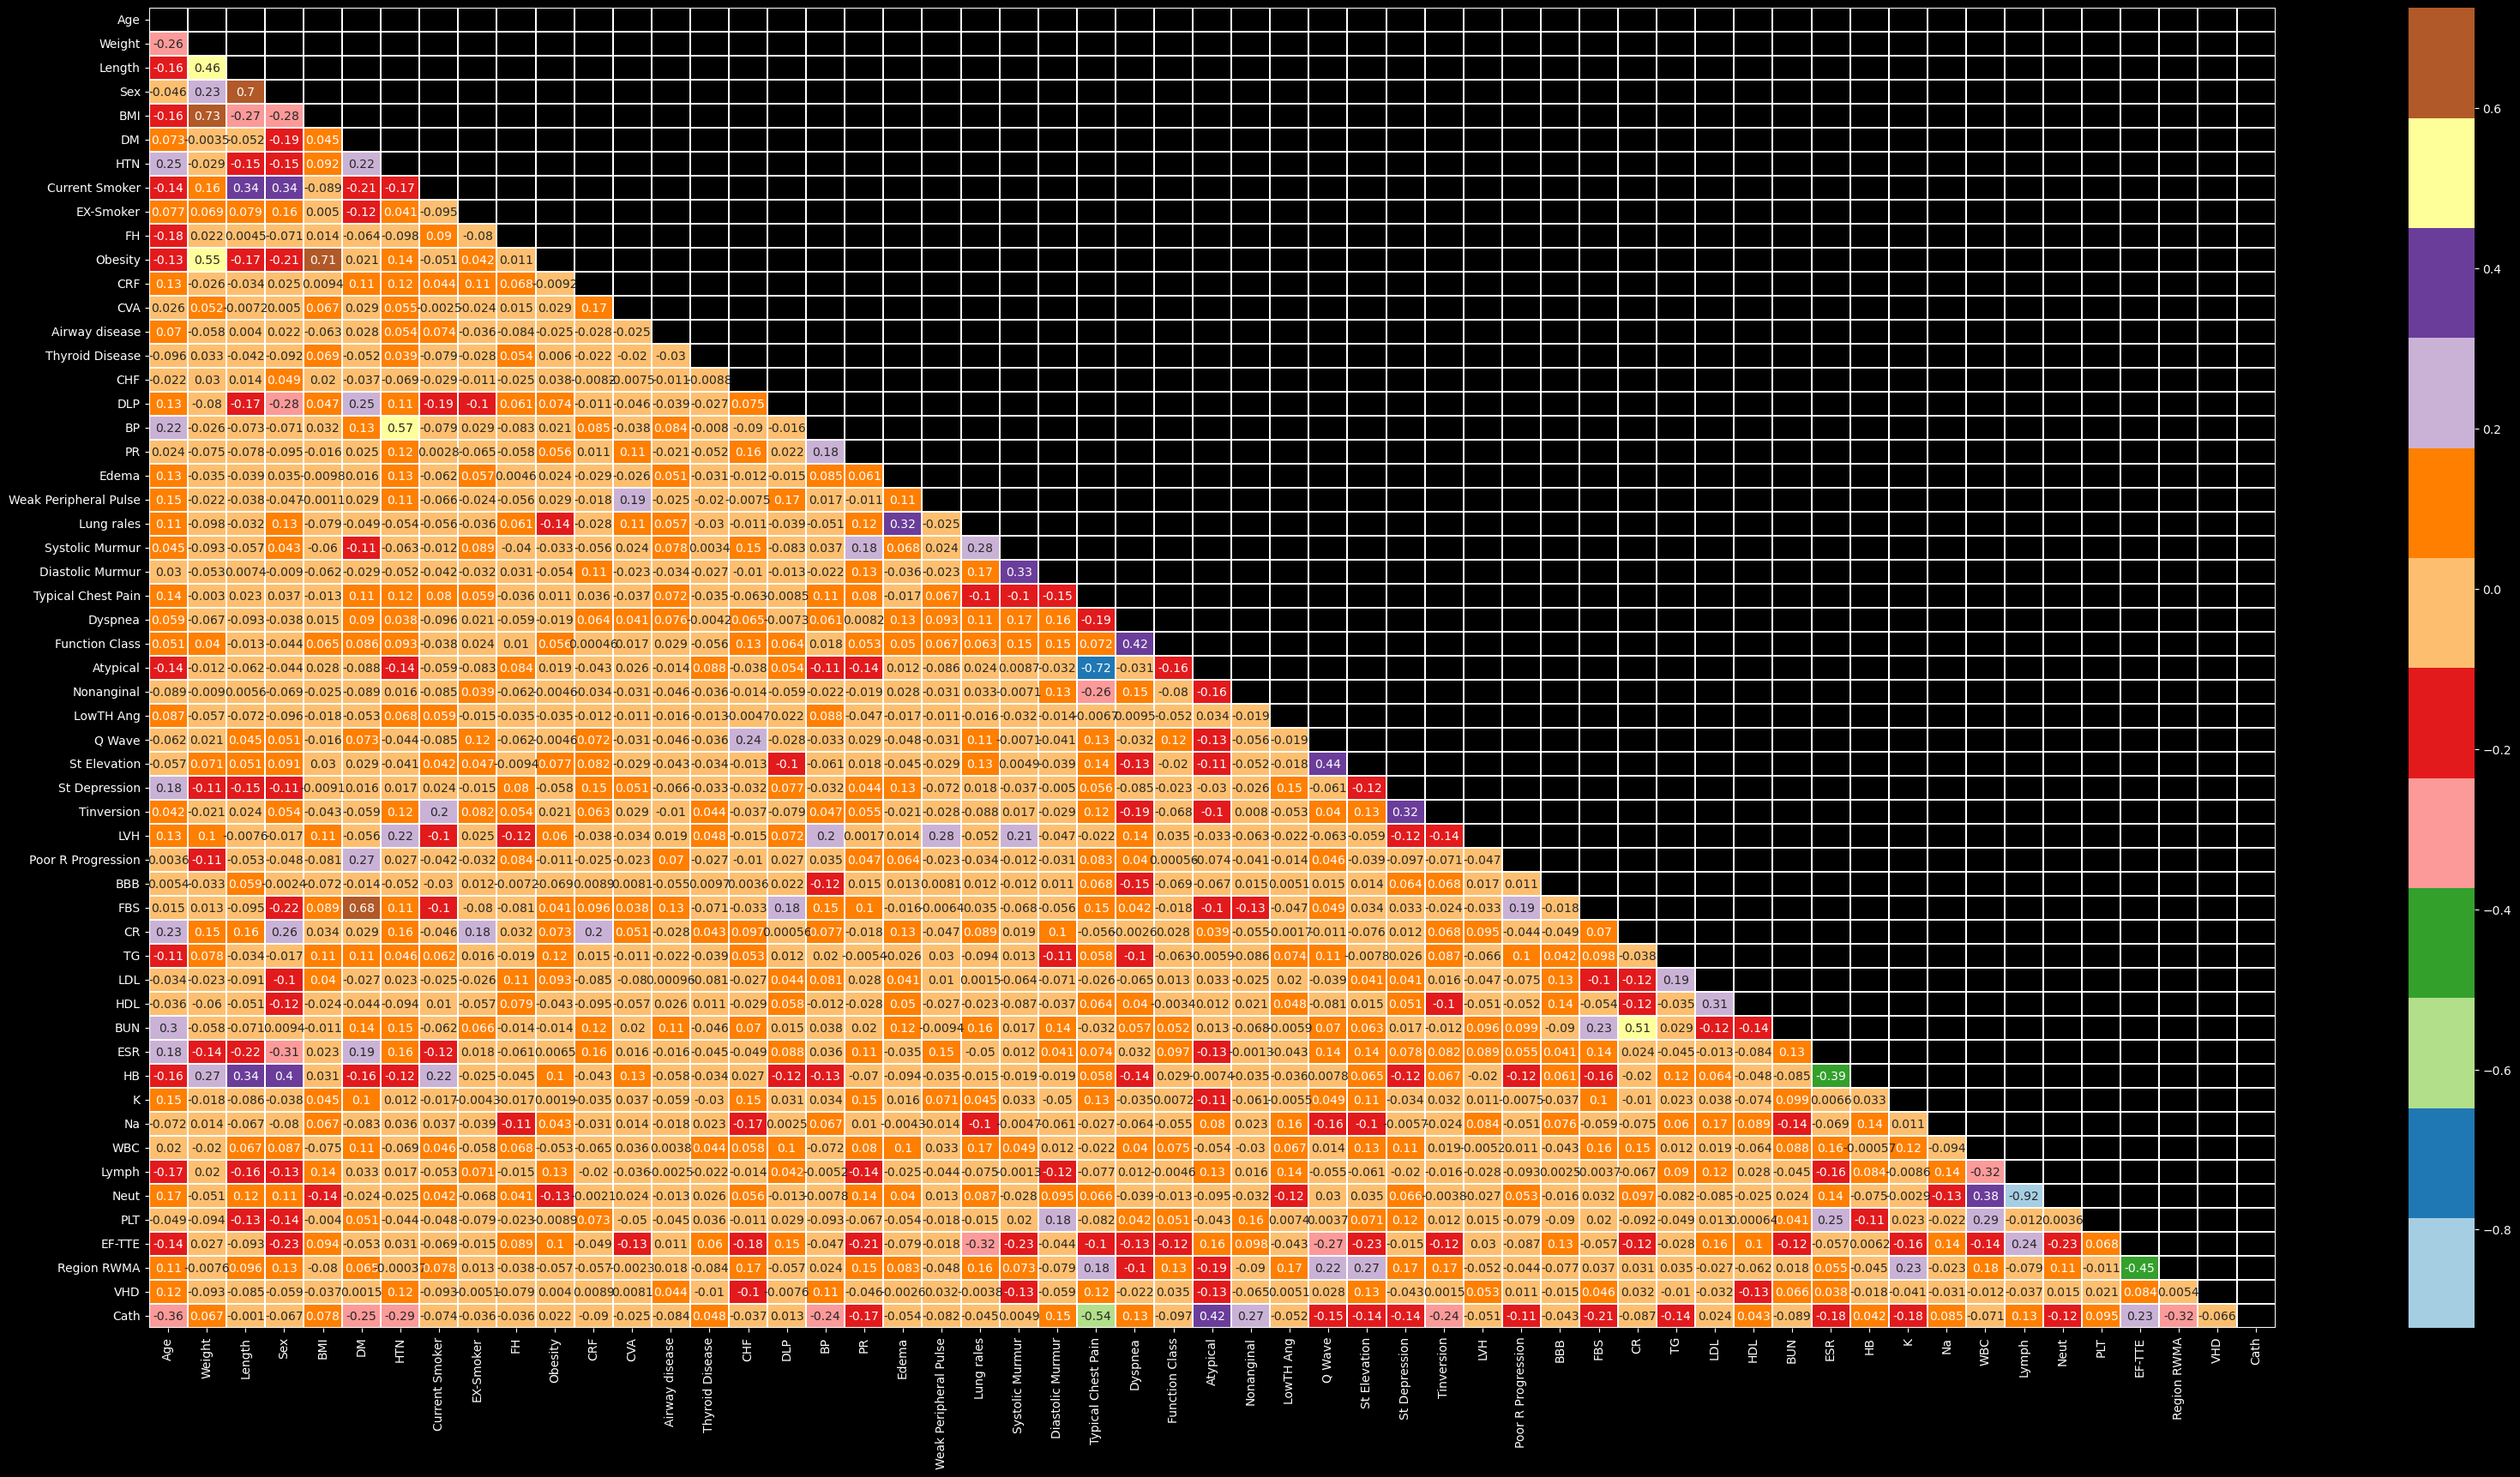

In [35]:
plt.figure(figsize=(40, 20))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, linewidth=.10, mask=matrix, cmap="Paired");

In [79]:
x = dataset.iloc[:,:-1].values
x

array([[-0.56844576,  1.35101196,  1.10433259, ...,  0.31068636,
        -0.54876069,  1.        ],
       [ 0.78093696, -0.32017246, -0.82860385, ..., -0.81133948,
         2.98899442,  1.        ],
       [-0.47206128, -1.65712   , -0.07690635, ..., -0.81133948,
         1.22011686,  3.        ],
       ...,
       [-1.05036816,  0.26474209, -0.50644778, ...,  0.87169929,
        -0.54876069,  1.        ],
       [-0.18290784,  1.35101196, -0.61383314, ...,  0.87169929,
        -0.54876069,  1.        ],
       [-0.27929232,  0.93321586,  0.5674058 , ...,  0.87169929,
        -0.54876069,  1.        ]])

In [80]:
y = dataset.iloc[:,-1].values
y

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [81]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state = 0)

In [82]:
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

# SVC(87%)

In [83]:
svc = SVC(kernel='linear', max_iter=500)
svc.fit(x_train,y_train)

C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=500)

In [84]:
y_pred = svc.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [85]:
y_test

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.])

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        20
         1.0       1.00      0.64      0.78        11

    accuracy                           0.87        31
   macro avg       0.92      0.82      0.84        31
weighted avg       0.89      0.87      0.86        31



[[20  0]
 [ 4  7]]


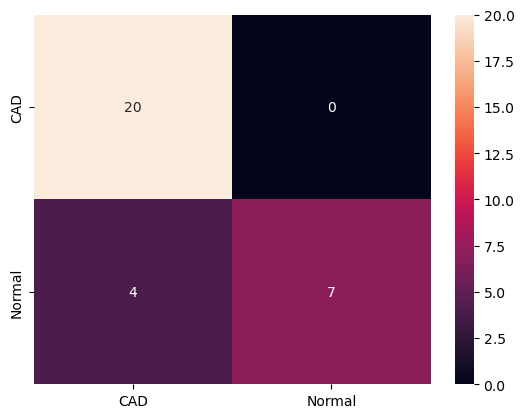

In [87]:
CM = confusion_matrix (y_test,y_pred)
sns.heatmap(CM,annot=True,
            fmt='g',
            xticklabels=['CAD','Normal'],
            yticklabels=['CAD','Normal'])
print (CM)

In [88]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

Actual  Predict
0      0.0      0.0
1      0.0      0.0
2      0.0      0.0
3      1.0      0.0
4      0.0      0.0
5      0.0      0.0
6      1.0      0.0
7      1.0      1.0
8      0.0      0.0
9      1.0      1.0
10     0.0      0.0
11     0.0      0.0
12     1.0      1.0
13     0.0      0.0
14     0.0      0.0
15     0.0      0.0
16     0.0      0.0
17     0.0      0.0
18     0.0      0.0
19     0.0      0.0
20     0.0      0.0
21     1.0      1.0
22     0.0      0.0
23     1.0      1.0
24     1.0      0.0
25     1.0      0.0
26     0.0      0.0
27     1.0      1.0
28     0.0      0.0
29     0.0      0.0
30     1.0      1.0

In [89]:
print ('y_test = ',y_test.sum())
print ('y_pred = ',y_pred.sum())

y_test =  11.0
y_pred =  7.0


<Axes: title={'center': ' Actual & Predict '}>

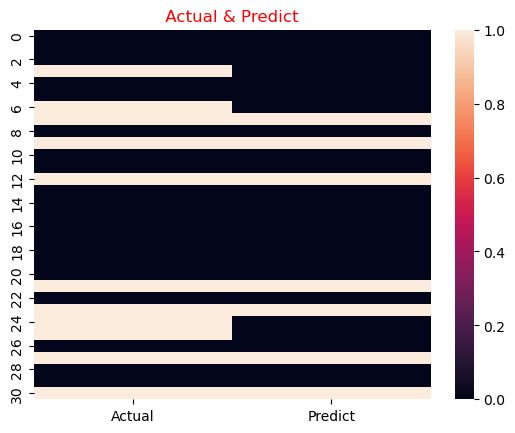

In [90]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x1c084735630>,
 [Text(-0.4368626645752139, -1.0095300947967052, 'Correct Result'),
  Text(0.436862664575214, 1.009530094796705, 'Wrong Result')],
 [Text(-0.23828872613193483, -0.550652778980021, '87%'),
  Text(0.23828872613193489, 0.5506527789800209, '13%')])

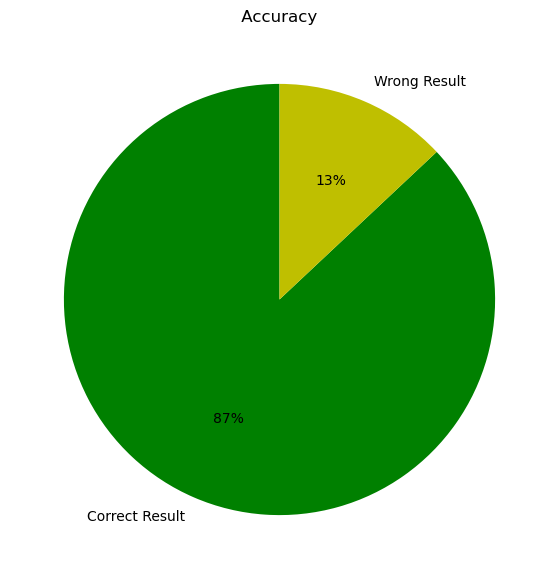

In [91]:
plt.style.use('default')
plt.figure(figsize=(12,7))
data = [87,13]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# RandomForestClassifier(90%)

In [92]:
RFC = RandomForestClassifier(n_estimators = 250,max_features = 30)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_features=30, n_estimators=250)

In [93]:
y_pred = RFC.predict(x_test)
y_pred

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [94]:
y_test

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.])

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.73      0.84        11

    accuracy                           0.90        31
   macro avg       0.93      0.86      0.89        31
weighted avg       0.92      0.90      0.90        31



[[20  0]
 [ 3  8]]


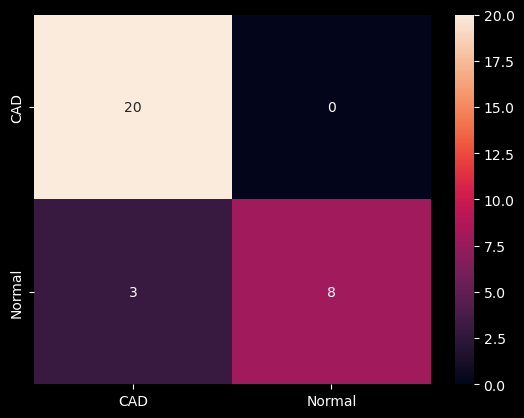

In [96]:
plt.style.use ("dark_background")
CM = confusion_matrix (y_test,y_pred)
sns.heatmap(CM,annot=True,
            fmt='g',
            xticklabels=['CAD','Normal'],
            yticklabels=['CAD','Normal'])
print (CM)

In [97]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

Actual  Predict
0      0.0      0.0
1      0.0      0.0
2      0.0      0.0
3      1.0      1.0
4      0.0      0.0
5      0.0      0.0
6      1.0      0.0
7      1.0      1.0
8      0.0      0.0
9      1.0      1.0
10     0.0      0.0
11     0.0      0.0
12     1.0      1.0
13     0.0      0.0
14     0.0      0.0
15     0.0      0.0
16     0.0      0.0
17     0.0      0.0
18     0.0      0.0
19     0.0      0.0
20     0.0      0.0
21     1.0      1.0
22     0.0      0.0
23     1.0      1.0
24     1.0      0.0
25     1.0      0.0
26     0.0      0.0
27     1.0      1.0
28     0.0      0.0
29     0.0      0.0
30     1.0      1.0

<Axes: title={'center': ' Actual & Predict '}>

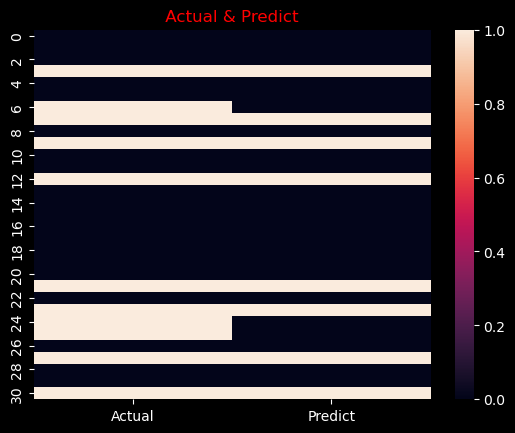

In [98]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x1c0feb278b0>,
 [Text(-0.33991877217145866, -1.046162142464278, 'Correct Result'),
  Text(0.3399188456330338, 1.0461621185951564, 'Wrong Result')],
 [Text(-0.18541023936625015, -0.5706338958896061, '90%'),
  Text(0.18541027943620023, 0.5706338828700852, '10%')])

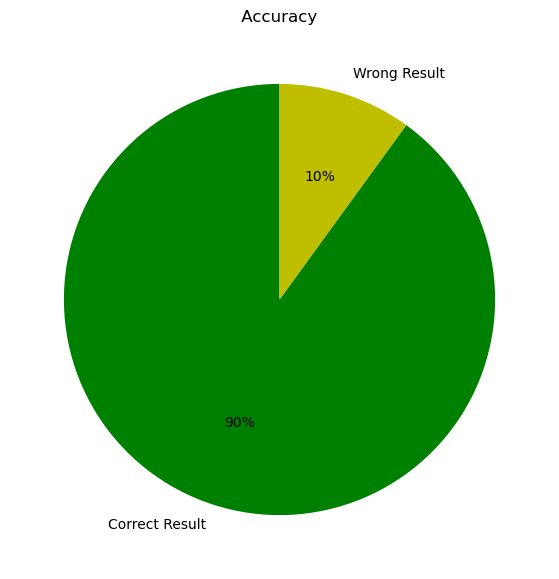

In [99]:
plt.style.use('default')
plt.figure(figsize=(12,7))
data = [90,10]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# XGBoost (90%)

In [100]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.01,max_depth=3,n_estimators=100,subsample=0.9,colsample_bytree=0.9)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
y_pred = xgb_model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1])

In [102]:
y_test

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.])

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.73      0.84        11

    accuracy                           0.90        31
   macro avg       0.93      0.86      0.89        31
weighted avg       0.92      0.90      0.90        31



In [104]:
CBC = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=5, loss_function='Logloss',verbose=100)
CBC.fit(x_train,y_train)

0:	learn: 0.6852223	total: 2.77ms	remaining: 274ms
99:	learn: 0.3468872	total: 198ms	remaining: 0us


In [105]:
y_pred = CBC.predict(x_test)
y_pred

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [106]:
y_test

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.])

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.73      0.84        11

    accuracy                           0.90        31
   macro avg       0.93      0.86      0.89        31
weighted avg       0.92      0.90      0.90        31



# Imbalanced Data

In [120]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [133]:
CBC = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=5, loss_function='Logloss',verbose=100)
CBC.fit(X_res,y_res)

0:	learn: 0.6838406	total: 3.36ms	remaining: 333ms
99:	learn: 0.2974809	total: 260ms	remaining: 0us


In [134]:
y_pred = CBC.predict(x_test)
y_pred

array([0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        20
         1.0       0.90      0.82      0.86        11

    accuracy                           0.90        31
   macro avg       0.90      0.88      0.89        31
weighted avg       0.90      0.90      0.90        31



In [137]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

class SMOTE2:
    
    def __init__(self, k_neighbors=5, random_state=None):
        self.k = k_neighbors
        self.rng = np.random.RandomState(random_state)
        
    def _generate_samples(self, X, y, minority_class):
        # find the k nearest neighbors of each minority class sample
        nn = NearestNeighbors(n_neighbors=self.k).fit(X)
        minority_indices = np.where(y == minority_class)[0]
        nn_distances, nn_indices = nn.kneighbors(X[minority_indices])
        
        # randomly choose neighbors and generate synthetic samples
        n_minority = len(minority_indices)
        n_synthetic = int(n_minority * self.ratio) - n_minority
        synthetic_indices = np.zeros((n_synthetic, X.shape[1]))
        
        for i in range(n_synthetic):
            j = self.rng.randint(n_minority)
            nn = nn_indices[j, self.rng.randint(1, self.k)]
            gap = self.rng.rand(X.shape[1])
            synthetic_indices[i] = X[minority_indices[j]] + gap * (X[nn] - X[minority_indices[j]])
        
        return synthetic_indices
        
    def fit_resample(self, X, y, ratio=1.0):
        self.ratio = ratio
        unique_classes = np.unique(y)
        X_resampled = np.copy(X)
        y_resampled = np.copy(y)
        
        for minority_class in unique_classes:
            if minority_class == np.argmax(np.bincount(y)):
                continue
            
            synthetic_indices = self._generate_samples(X, y, minority_class)
            X_resampled = np.vstack([X_resampled, synthetic_indices])
            y_resampled = np.hstack([y_resampled, np.full((len(synthetic_indices), ), minority_class)])
            
        return X_resampled, y_resampled

In [139]:
sm = SMOTE2(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train.astype(int))

In [140]:
CBC = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=5, loss_function='Logloss',verbose=100)
CBC.fit(X_res,y_res)
y_pred = CBC.predict(x_test)
y_pred

0:	learn: 0.6852223	total: 2.5ms	remaining: 248ms
99:	learn: 0.3468872	total: 216ms	remaining: 0us


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.73      0.84        11

    accuracy                           0.90        31
   macro avg       0.93      0.86      0.89        31
weighted avg       0.92      0.90      0.90        31



In [195]:
RFC = RandomForestClassifier(n_estimators=250,max_features = 55,max_depth=2, random_state=42,max_leaf_nodes=15)
RFC.fit(X_res,y_res)
y_pred = RFC.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1])

In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.73      0.84        11

    accuracy                           0.90        31
   macro avg       0.93      0.86      0.89        31
weighted avg       0.92      0.90      0.90        31



In [198]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)

In [208]:
RFC = RandomForestClassifier(n_estimators=250,max_features = 55,max_depth=5, random_state=42,max_leaf_nodes=8)
RFC.fit(X_train_resampled,y_train_resampled)
y_pred = RFC.predict(x_test)
y_pred

array([0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        20
         1.0       0.90      0.82      0.86        11

    accuracy                           0.90        31
   macro avg       0.90      0.88      0.89        31
weighted avg       0.90      0.90      0.90        31



In [201]:
# train logistic regression model on resampled data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# evaluate model on testing data
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.73      0.84        11

    accuracy                           0.90        31
   macro avg       0.93      0.86      0.89        31
weighted avg       0.92      0.90      0.90        31



In [213]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_resampled, y_train_resampled)
y_pred=clf.predict(x_test)

In [214]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        20
         1.0       1.00      0.55      0.71        11

    accuracy                           0.84        31
   macro avg       0.90      0.77      0.80        31
weighted avg       0.87      0.84      0.82        31

